In [5]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=64
# Define the image transformations here
gen = ImageDataGenerator(horizontal_flip = False,
                         vertical_flip = False,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 10)

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from ExecutionAttributes import ExecutionAttribute
from keras.utils import plot_model
from skimage import io as io
import cv2
import os
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support as score
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

# Execution Attributes
attr = ExecutionAttribute()

# dimensions of our images.
attr.img_width, attr.img_height = 32, 32

# network parameters
attr.path = 'C:/Users/hp/Downloads/cars_train'
#attr.path = '/home/amenegotto/Downloads/cars'
attr.epochs = 200
attr.batch_size = 2
attr.set_dir_names()

if K.image_data_format() == 'channels_first':
    input_s = (3, attr.img_width, attr.img_height)
else:
    input_s = (attr.img_width, attr.img_height, 3)

In [8]:
def load_data(filepath):
    files = pd.read_csv(filepath)
    images = []
    prices = files[['price']]
    labels = []

    for i, r in files.iterrows():
        print(r['path'] + ' - ' + str(r['price']))

        #image = load_img(attr.path + '/' + r['path'])
        #image.thumbnail((attr.img_width, attr.img_height))

        # image = io.imread()
        # image = image.reshape([attr.img_width, attr.img_height, 3])

        image = cv2.imread(attr.path + '/' + r['path'])
        image = cv2.resize(image, (attr.img_width, attr.img_height))
        image = img_to_array(image)
        images.append(image)

        if "barato" in r['path']:
            labels.append(0)
        else:
            labels.append(1)

    return (np.array(images, dtype="float") / 255.0), np.array(prices), np.array(labels)


images_train, prices_train, labels_train = load_data(attr.path + '/train.csv')
images_valid, prices_valid, labels_valid = load_data(attr.path + '/valid.csv')
images_test, prices_test, labels_test = load_data(attr.path + '/test.csv')

print("[INFO] Training image size: {:.2f}MB".format(images_train.nbytes / (1024 * 1000.0)))
print("[INFO] Validation image size: {:.2f}MB".format(images_valid.nbytes / (1024 * 1000.0)))
print("[INFO] Testing image size: {:.2f}MB".format(images_test.nbytes / (1024 * 1000.0)))

train/barato/01003.jpg - 6230
train/barato/01005.jpg - 5925
train/barato/01006.jpg - 8186
train/barato/01007.jpg - 6798
train/barato/01009.jpg - 2355
train/barato/01010.jpg - 7285
train/barato/01012.jpg - 403
train/barato/01014.jpg - 2859
train/barato/01015.jpg - 7136
train/barato/01016.jpg - 9031
train/barato/01017.jpg - 6631
train/barato/01019.jpg - 2011
train/barato/01020.jpg - 9468
train/barato/01025.jpg - 2866
train/barato/01026.jpg - 5383
train/barato/01027.jpg - 3942
train/barato/01029.jpg - 2597
train/barato/01030.jpg - 9729
train/barato/01031.jpg - 22
train/barato/01032.jpg - 6954
train/barato/01033.jpg - 9004
train/barato/01034.jpg - 5591
train/barato/01035.jpg - 7565
train/barato/01036.jpg - 2718
train/barato/01037.jpg - 8651
train/barato/01038.jpg - 1429
train/barato/01039.jpg - 9192
train/barato/01041.jpg - 2909
train/barato/01042.jpg - 4294
train/barato/01043.jpg - 9514
train/barato/01044.jpg - 9114
train/barato/01045.jpg - 2567
train/barato/01047.jpg - 4465
train/barato/

In [9]:
#for i in range(0,len(images_train)):
#    plt.imshow(images_train[i])

#plt.show()

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

    plt.show()

#show_images(images_train[0:50], 3)
#fig=plt.figure()

#for i in range(0,len(images_train)):
#    img = images_train[i]
#    fig.add_subplot(i,2,1)
#    plt.imshow(img)
    
#plot.show()    

In [10]:
foo = gen.flow(images_train, labels_train,  batch_size=attr.batch_size, seed=666)

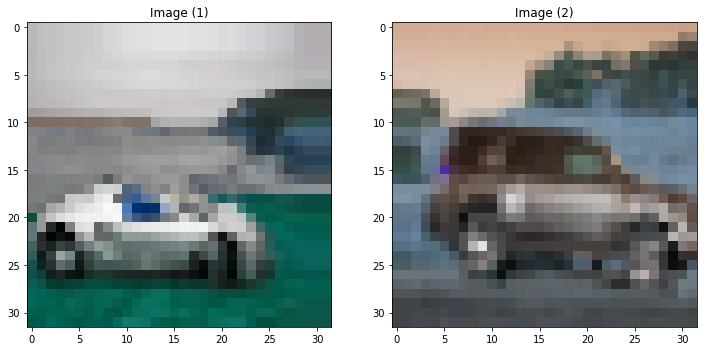

In [186]:
foo2 = foo.next()

#print(foo2[0])
#print(foo2[0].shape)

show_images(foo2[0], 1)

#plt.imshow(image_x)

#plt.show()
#for i in range(0, 2):
#	plt.subplot(330 + 1 + i)
#	plt.imshow(foo[i], cmap=plt.get_cmap('gray'))
# show the plot


In [11]:
def gen_flow_for_two_inputs(X1, X2, y):
    genX1 = gen.flow(X1, y,  batch_size=attr.batch_size, seed=666)
    genX2 = gen.flow(X1, X2, batch_size=attr.batch_size, seed=666)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            #Assert arrays are equal - this was for peace of mind, but slows down training
            #np.testing.assert_array_equal(X1i[0],X2i[0])
            print("\n\n\n\n====================Images==========================")                        
            show_images(X1i[0], 1)
            print("\n\n====================Prices==========================")
            print(X2i[1])
            print("\n\n====================Labels==========================")
            print(X1i[1])
            yield [X1i[0], X2i[1]], X1i[1]

In [12]:
gen_flow = gen_flow_for_two_inputs(images_train, prices_train, labels_train)

In [13]:
visible = Input(shape=input_s)
conv1 = Conv2D(32, (3,3), activation='relu')(visible)
bn1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)
conv2 = Conv2D(16, (3,3), activation='relu')(pool1)
bn2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)
flat = Flatten()(pool2)

# as in this POC we have only one auxiliary variable, there's no need for another ANN, just concat in flatten before FC
attributes_input = Input(shape=(1,))
concat = concatenate([flat, attributes_input])

hidden1 = Dense(10, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[visible, attributes_input], outputs=output)


[INFO] training model...
Epoch 1/2




====================Images==========================


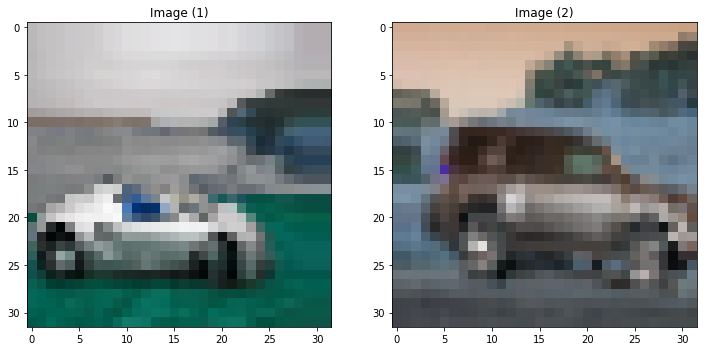



====================Prices==========================
[[588583]
 [  2409]]


====================Labels==========================
[1 0]




====================Images==========================


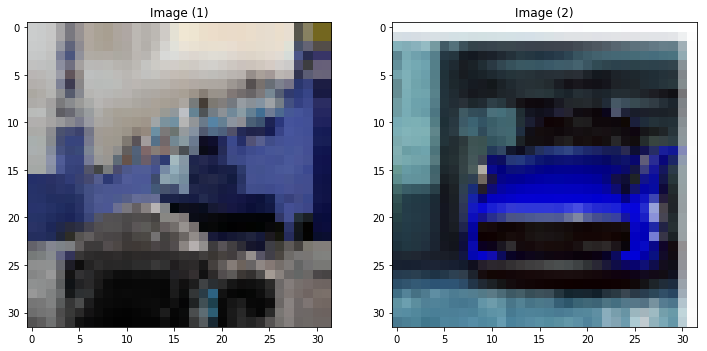



====================Prices==========================
[[978085]
 [242291]]


====================Labels==========================
[1 1]




====================Images==========================


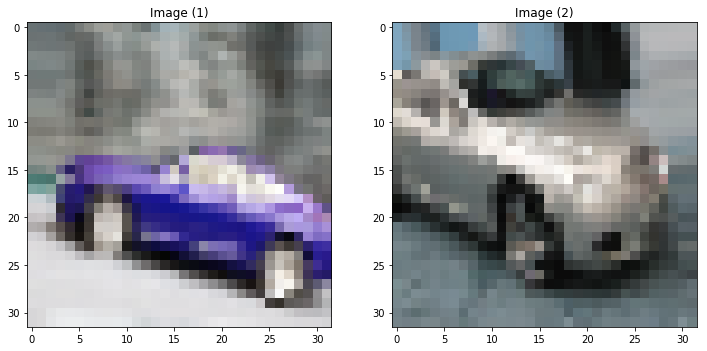



====================Prices==========================
[[974187]
 [687336]]


====================Labels==========================
[1 1]




====================Images==========================


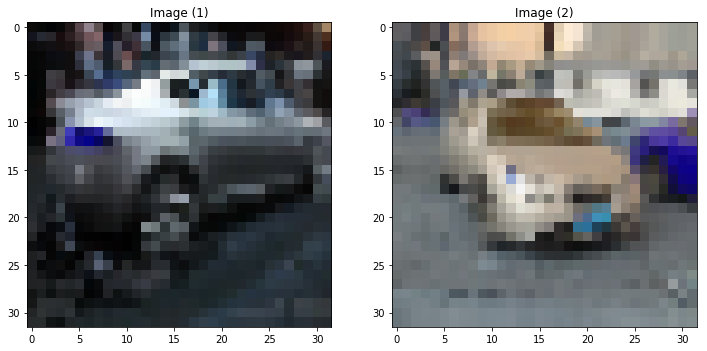



====================Prices==========================
[[20197]
 [ 7565]]


====================Labels==========================
[1 0]




====================Images==========================
 4/85 [>.............................] - ETA: 1:01 - loss: 3.9856 - acc: 0.7500

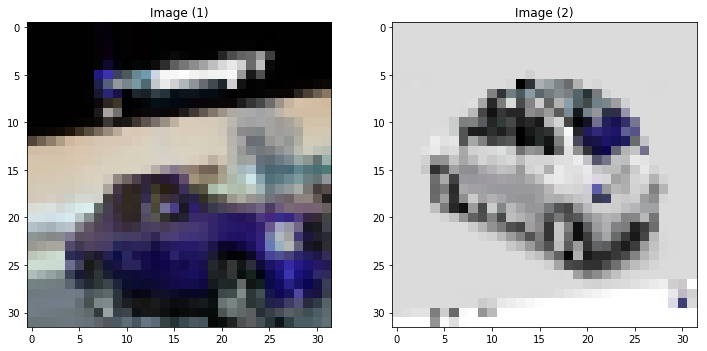



====================Prices==========================
[[5925]
 [2859]]


====================Labels==========================
[0 0]




====================Images==========================
 5/85 [>.............................] - ETA: 50s - loss: 6.3770 - acc: 0.6000 

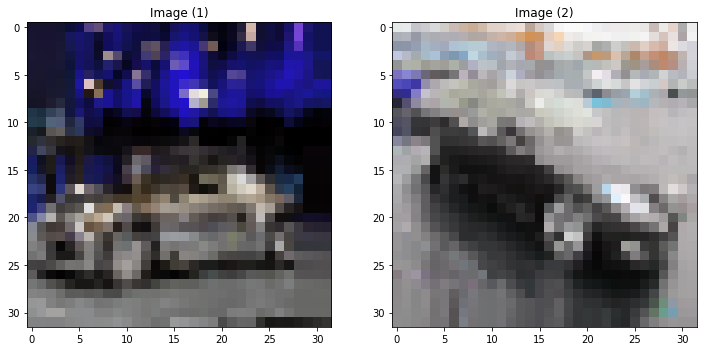



====================Prices==========================
[[982190]
 [  6798]]


====================Labels==========================
[1 0]
 6/85 [=>............................] - ETA: 48s - loss: 6.6427 - acc: 0.5833



====================Images==========================


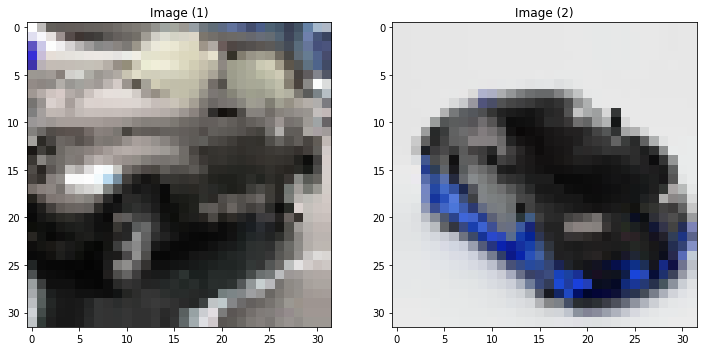



====================Prices==========================
[[  2987]
 [412084]]


====================Labels==========================
[0 1]




====================Images==========================
 7/85 [=>............................] - ETA: 46s - loss: 6.8325 - acc: 0.5714

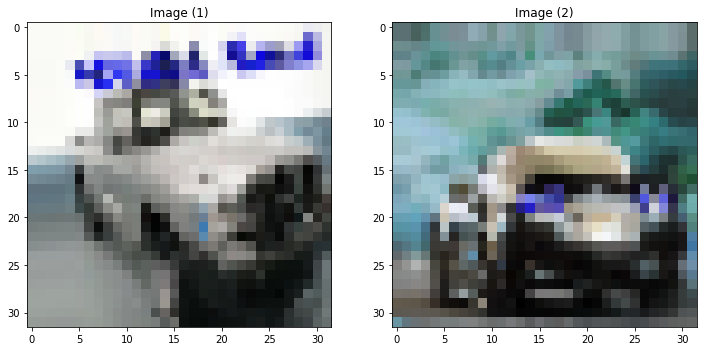



====================Prices==========================
[[  9114]
 [808864]]


====================Labels==========================
[0 1]




====================Images==========================
 8/85 [=>............................] - ETA: 44s - loss: 6.9748 - acc: 0.5625

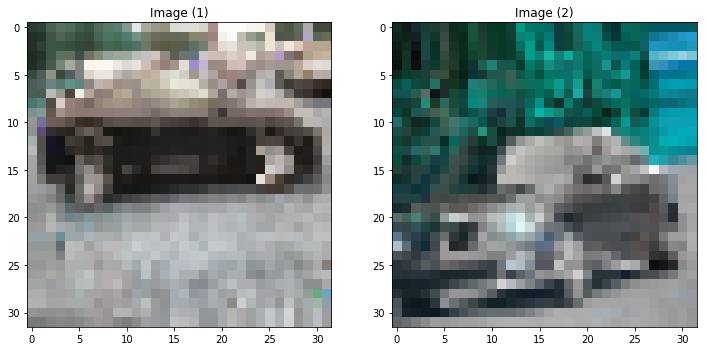



====================Prices==========================
[[  9832]
 [924721]]


====================Labels==========================
[0 1]




====================Images==========================
 9/85 [==>...........................] - ETA: 45s - loss: 7.0855 - acc: 0.5556

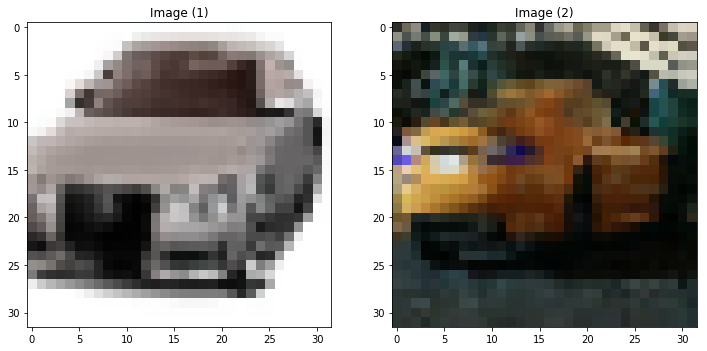



====================Prices==========================
[[277451]
 [ 51505]]


====================Labels==========================
[1 1]




====================Images==========================
10/85 [==>...........................] - ETA: 43s - loss: 6.3770 - acc: 0.6000

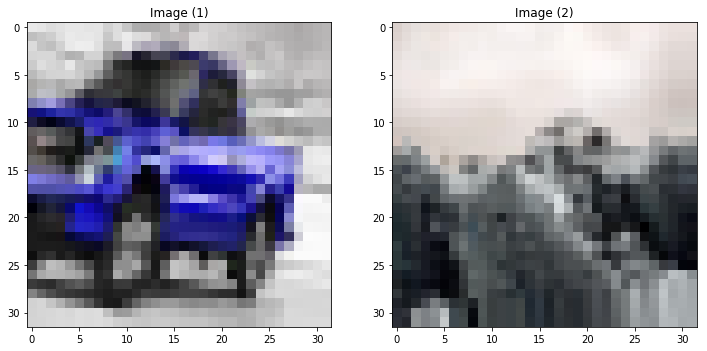



====================Prices==========================
[[1723]
 [ 980]]


====================Labels==========================
[0 0]




====================Images==========================
11/85 [==>...........................] - ETA: 42s - loss: 7.2465 - acc: 0.5455

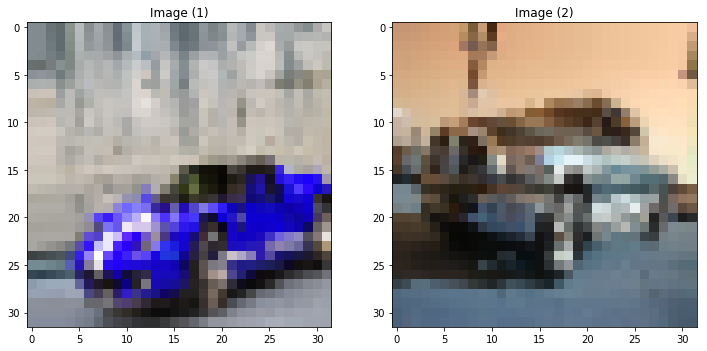



====================Prices==========================
[[131838]
 [  5371]]


====================Labels==========================
[1 0]




====================Images==========================
12/85 [===>..........................] - ETA: 41s - loss: 7.3069 - acc: 0.5417

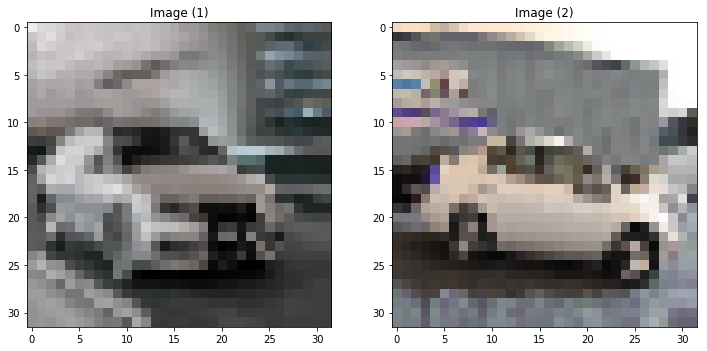



====================Prices==========================
[[822779]
 [  8486]]


====================Labels==========================
[1 0]




====================Images==========================
13/85 [===>..........................] - ETA: 40s - loss: 7.3580 - acc: 0.5385

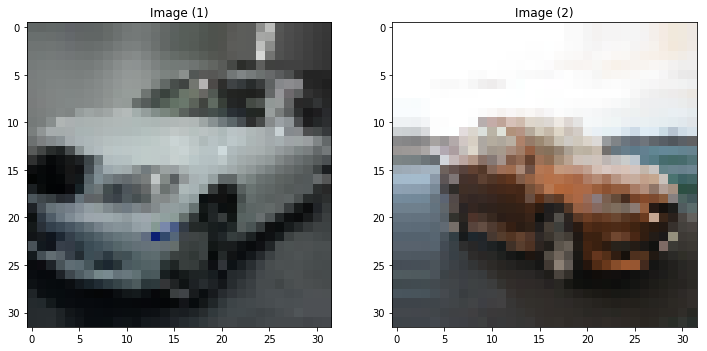



====================Prices==========================
[[67472]
 [ 4099]]


====================Labels==========================
[1 0]




====================Images==========================
14/85 [===>..........................] - ETA: 39s - loss: 7.4018 - acc: 0.5357

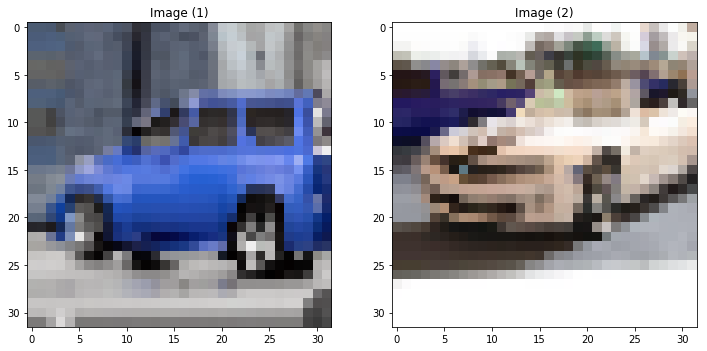



====================Prices==========================
[[  5250]
 [478907]]


====================Labels==========================
[0 1]




====================Images==========================
15/85 [====>.........................] - ETA: 38s - loss: 7.4398 - acc: 0.5333

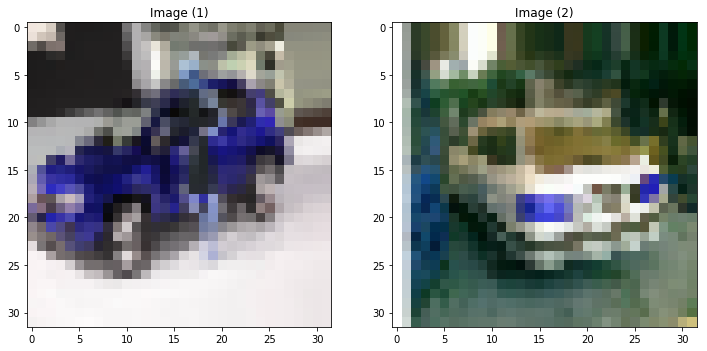



====================Prices==========================
[[2567]
 [9027]]


====================Labels==========================
[0 0]




====================Images==========================
16/85 [====>.........................] - ETA: 39s - loss: 7.9712 - acc: 0.5000

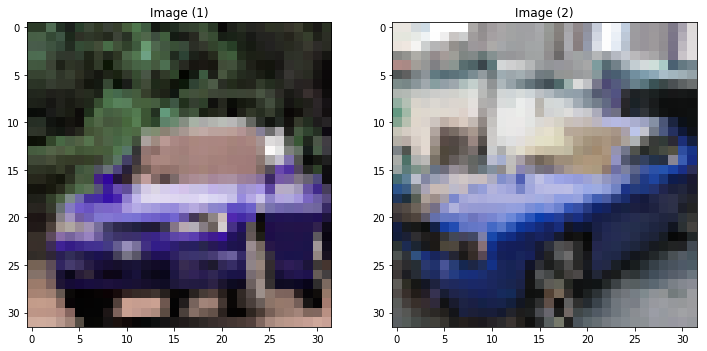



====================Prices==========================
[[  6525]
 [173013]]


====================Labels==========================
[0 1]




====================Images==========================
17/85 [=====>........................] - ETA: 38s - loss: 7.9712 - acc: 0.5000

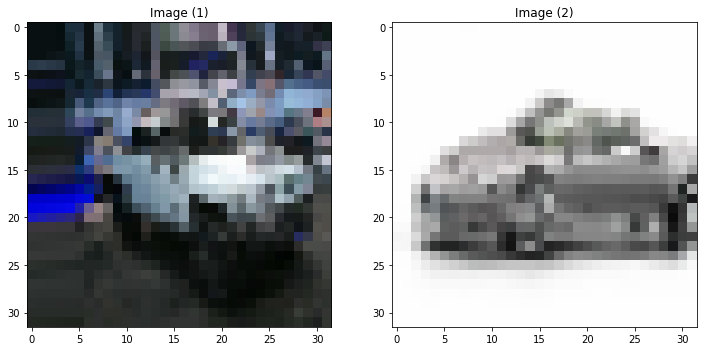



====================Prices==========================
[[  9514]
 [435346]]


====================Labels==========================
[0 1]




====================Images==========================
18/85 [=====>........................] - ETA: 37s - loss: 7.9712 - acc: 0.5000

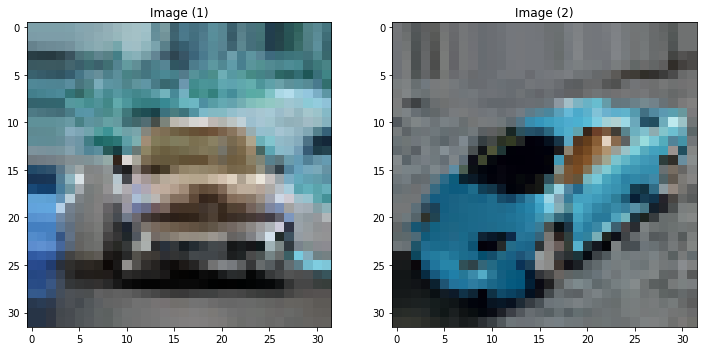



====================Prices==========================
[[823246]
 [866495]]


====================Labels==========================
[1 1]




====================Images==========================
19/85 [=====>........................] - ETA: 36s - loss: 7.5517 - acc: 0.5263

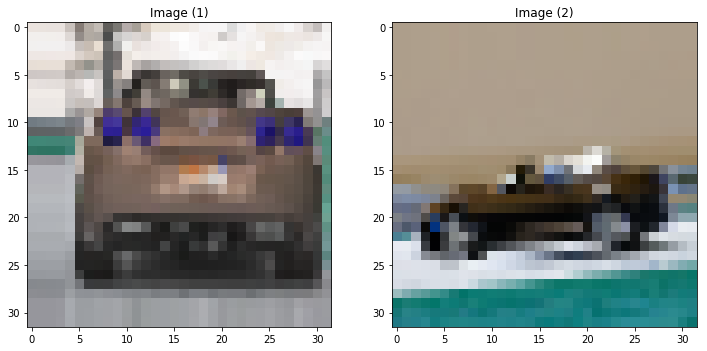



====================Prices==========================
[[944072]
 [139177]]


====================Labels==========================
[1 1]




====================Images==========================
20/85 [======>.......................] - ETA: 35s - loss: 7.1741 - acc: 0.5500

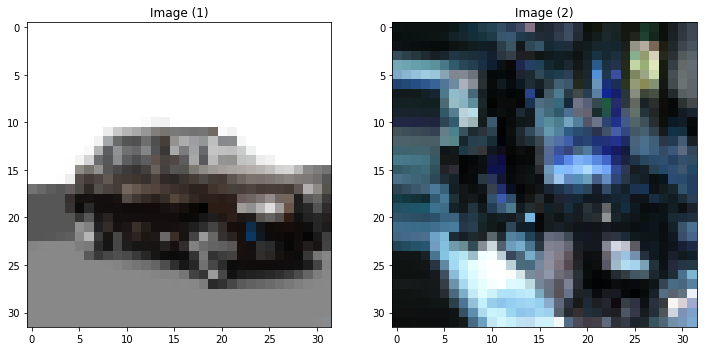



====================Prices==========================
[[436384]
 [643521]]


====================Labels==========================
[1 1]




====================Images==========================
21/85 [======>.......................] - ETA: 35s - loss: 6.8325 - acc: 0.5714

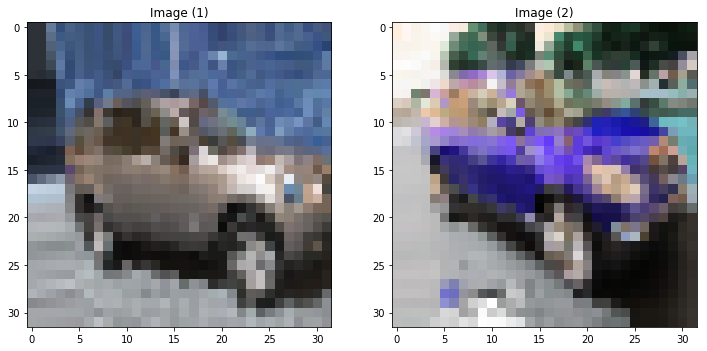



====================Prices==========================
[[9454]
 [3942]]


====================Labels==========================
[0 0]




====================Images==========================
22/85 [======>.......................] - ETA: 35s - loss: 7.2465 - acc: 0.5455

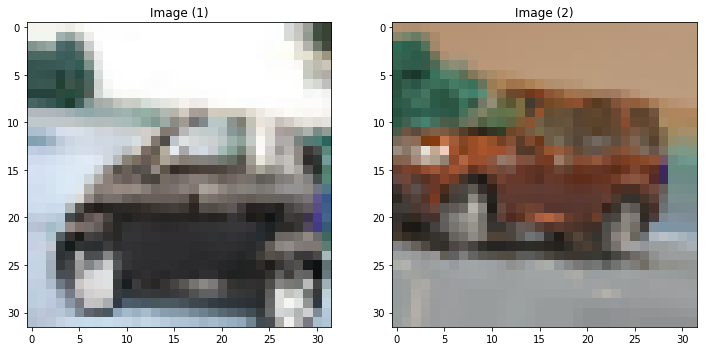



====================Prices==========================
[[  3800]
 [926553]]


====================Labels==========================
[0 1]




====================Images==========================
23/85 [=======>......................] - ETA: 34s - loss: 7.2780 - acc: 0.5435

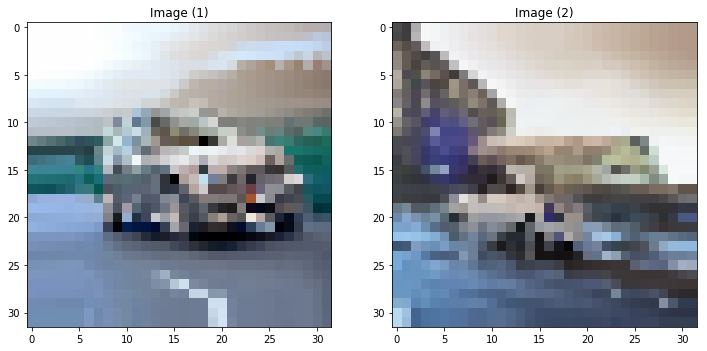



====================Prices==========================
[[376502]
 [  6230]]


====================Labels==========================
[1 0]




====================Images==========================
24/85 [=======>......................] - ETA: 33s - loss: 7.3069 - acc: 0.5417

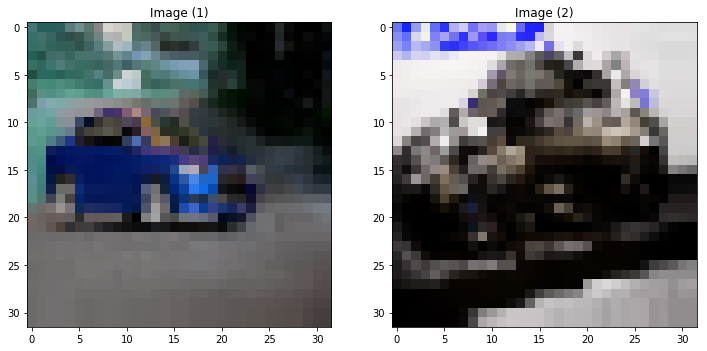



====================Prices==========================
[[  5802]
 [437339]]


====================Labels==========================
[0 1]




====================Images==========================
25/85 [=======>......................] - ETA: 33s - loss: 7.3335 - acc: 0.5400

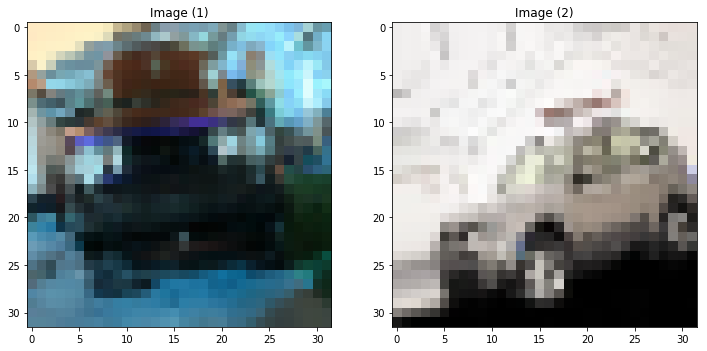



====================Prices==========================
[[2537]
 [1239]]


====================Labels==========================
[0 0]




====================Images==========================
26/85 [========>.....................] - ETA: 32s - loss: 7.6646 - acc: 0.5192

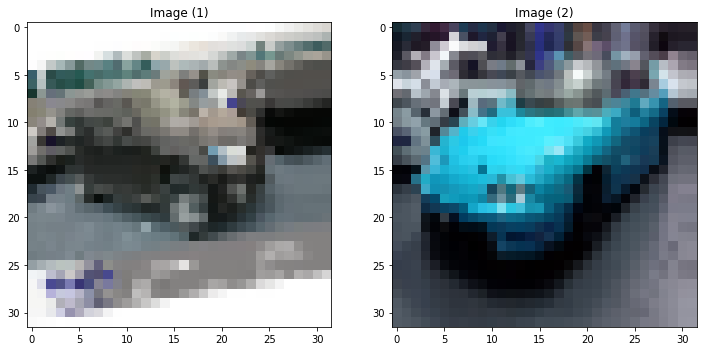



====================Prices==========================
[[1077]
 [ 403]]


====================Labels==========================
[0 0]




====================Images==========================
27/85 [========>.....................] - ETA: 31s - loss: 7.9712 - acc: 0.5000

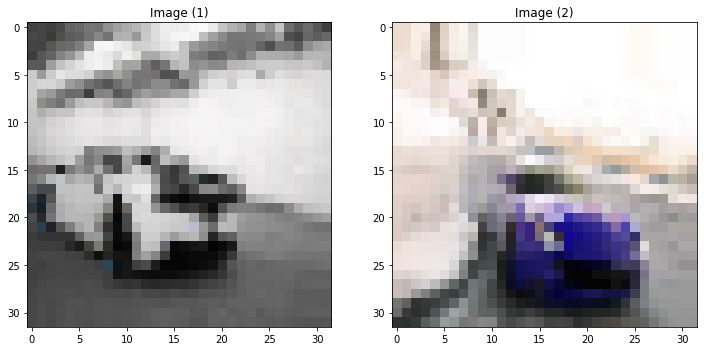



====================Prices==========================
[[676540]
 [811858]]


====================Labels==========================
[1 1]




====================Images==========================
28/85 [========>.....................] - ETA: 31s - loss: 7.6865 - acc: 0.5179

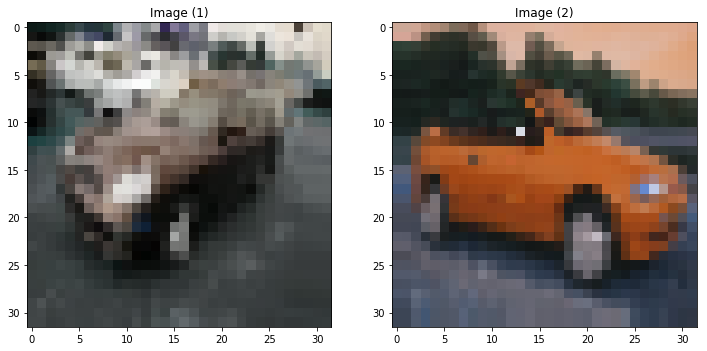



====================Prices==========================
[[4465]
 [4347]]


====================Labels==========================
[0 0]




====================Images==========================
29/85 [=========>....................] - ETA: 30s - loss: 7.9712 - acc: 0.5000

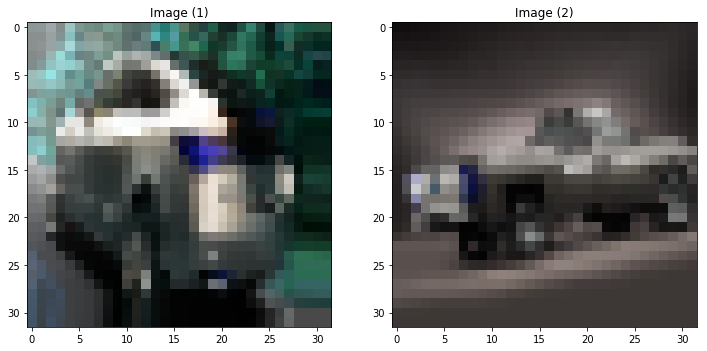



====================Prices==========================
[[552650]
 [  1596]]


====================Labels==========================
[1 0]




====================Images==========================
30/85 [=========>....................] - ETA: 29s - loss: 7.9712 - acc: 0.5000

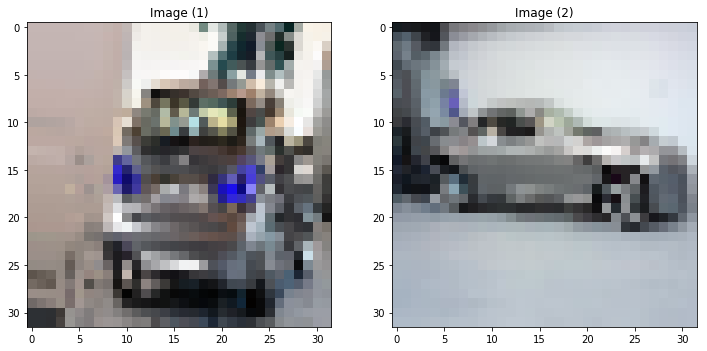



====================Prices==========================
[[ 9007]
 [26534]]


====================Labels==========================
[0 1]




====================Images==========================
31/85 [=========>....................] - ETA: 29s - loss: 7.9712 - acc: 0.5000

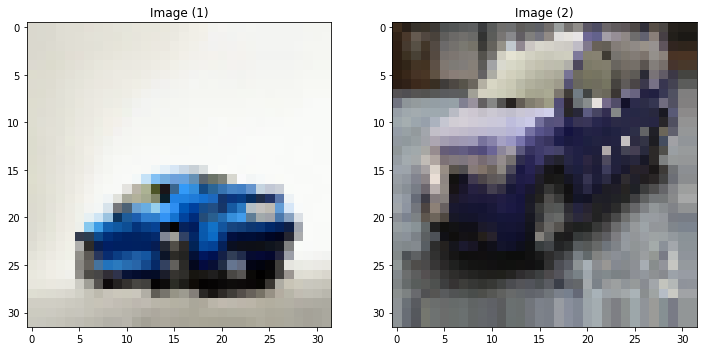



====================Prices==========================
[[990521]
 [  6032]]


====================Labels==========================
[1 0]




====================Images==========================
32/85 [==========>...................] - ETA: 28s - loss: 7.9712 - acc: 0.5000

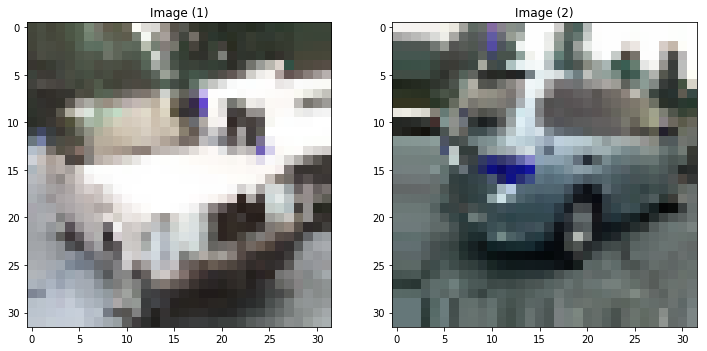



====================Prices==========================
[[7136]
 [6631]]


====================Labels==========================
[0 0]




====================Images==========================
33/85 [==========>...................] - ETA: 28s - loss: 8.2127 - acc: 0.4848

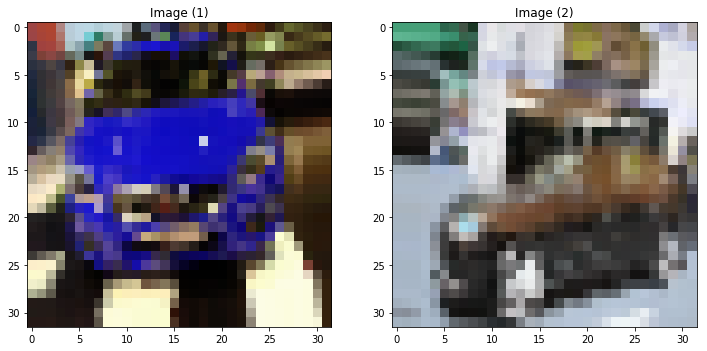



====================Prices==========================
[[747555]
 [  4294]]


====================Labels==========================
[1 0]




====================Images==========================
34/85 [===========>..................] - ETA: 27s - loss: 8.2056 - acc: 0.4853

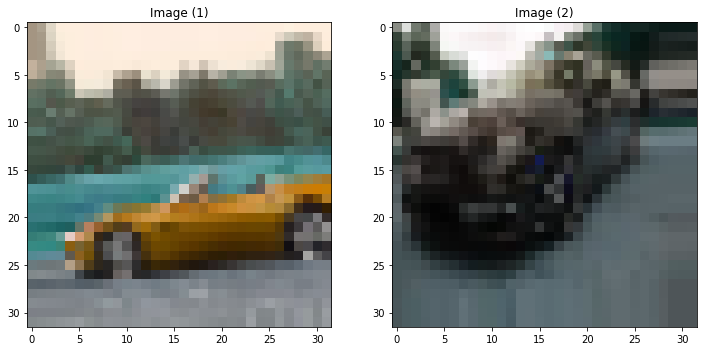



====================Prices==========================
[[431075]
 [730904]]


====================Labels==========================
[1 1]




====================Images==========================
35/85 [===========>..................] - ETA: 27s - loss: 7.9712 - acc: 0.5000

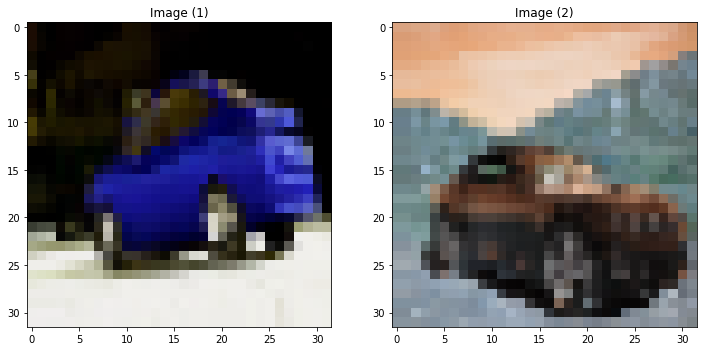



====================Prices==========================
[[  6663]
 [256523]]


====================Labels==========================
[0 1]




====================Images==========================
36/85 [===========>..................] - ETA: 26s - loss: 7.9712 - acc: 0.5000

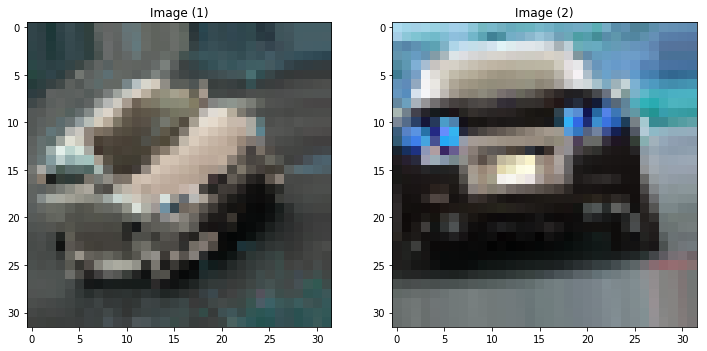



====================Prices==========================
[[   160]
 [255762]]


====================Labels==========================
[0 1]




====================Images==========================
37/85 [============>.................] - ETA: 25s - loss: 7.9159 - acc: 0.5000

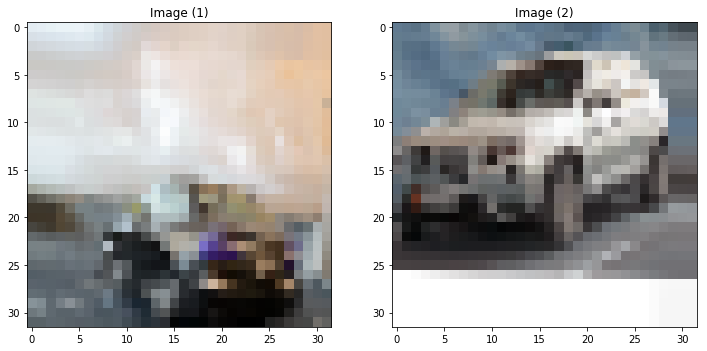



====================Prices==========================
[[488051]
 [  3126]]


====================Labels==========================
[1 0]




====================Images==========================
38/85 [============>.................] - ETA: 25s - loss: 7.9173 - acc: 0.5000

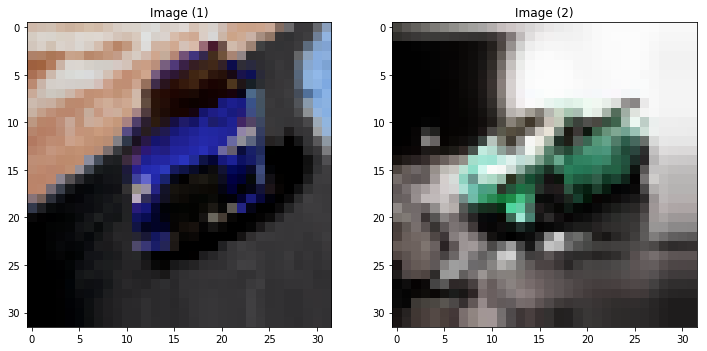



====================Prices==========================
[[  2430]
 [210950]]


====================Labels==========================
[0 1]




====================Images==========================
39/85 [============>.................] - ETA: 24s - loss: 7.9187 - acc: 0.5000

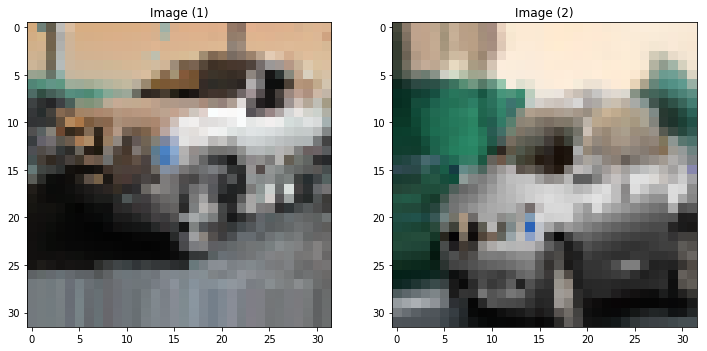



====================Prices==========================
[[9729]
 [2866]]


====================Labels==========================
[0 0]




====================Images==========================
40/85 [=============>................] - ETA: 24s - loss: 8.1193 - acc: 0.4875

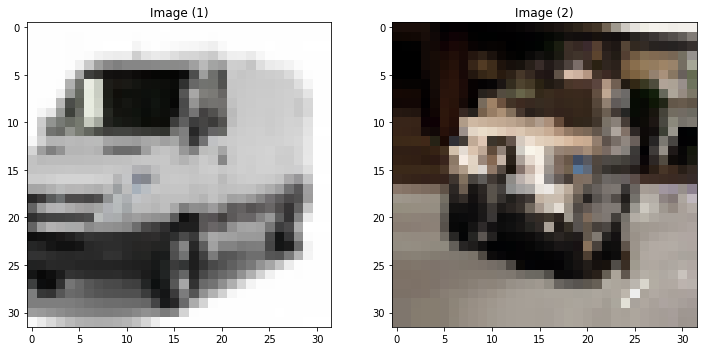



====================Prices==========================
[[2620]
 [7293]]


====================Labels==========================
[0 0]




====================Images==========================
41/85 [=============>................] - ETA: 23s - loss: 8.3101 - acc: 0.4756

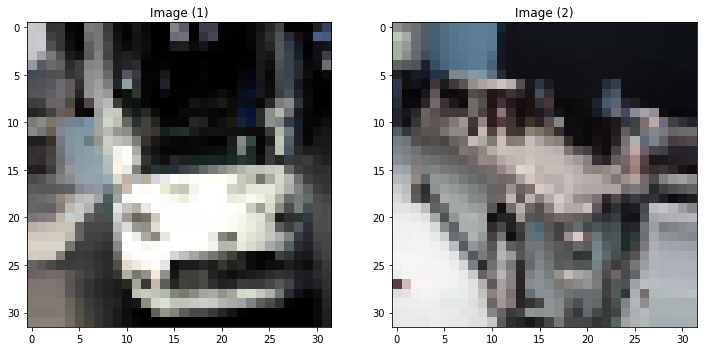



====================Prices==========================
[[311904]
 [515991]]


====================Labels==========================
[1 1]




====================Images==========================
42/85 [=============>................] - ETA: 23s - loss: 8.1122 - acc: 0.4881

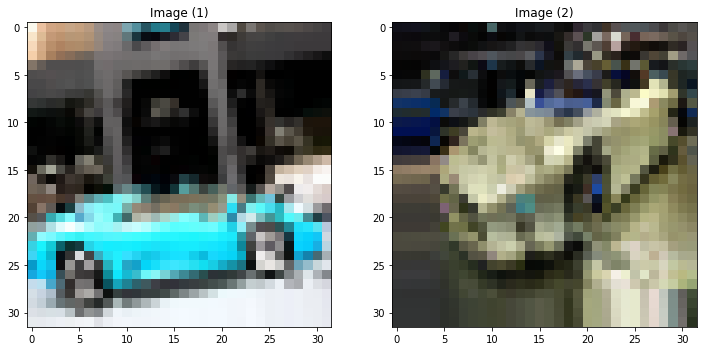



====================Prices==========================
[[943462]
 [204287]]


====================Labels==========================
[1 1]




====================Images==========================
43/85 [==============>...............] - ETA: 22s - loss: 7.9236 - acc: 0.5000

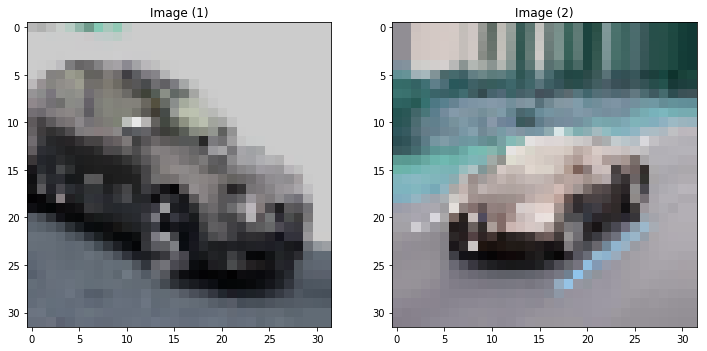



====================Prices==========================
[[  8831]
 [940192]]


====================Labels==========================
[0 1]




====================Images==========================
44/85 [==============>...............] - ETA: 22s - loss: 7.9247 - acc: 0.5000

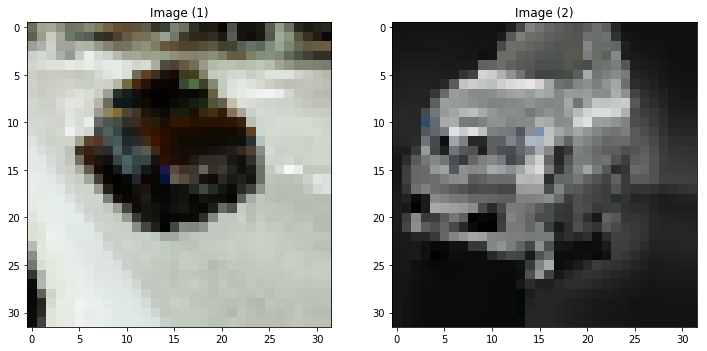



====================Prices==========================
[[434346]
 [    22]]


====================Labels==========================
[1 0]




====================Images==========================
45/85 [==============>...............] - ETA: 21s - loss: 7.7572 - acc: 0.5000

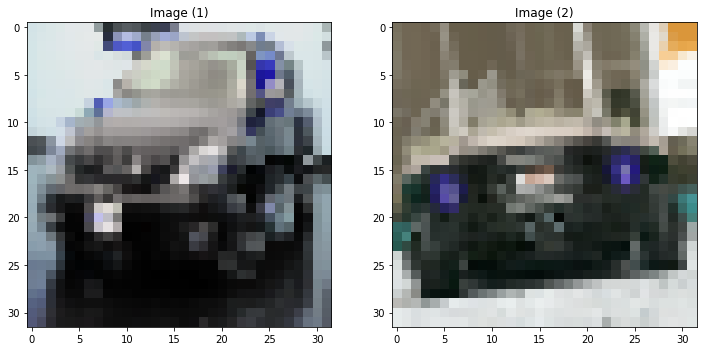



====================Prices==========================
[[  2358]
 [515664]]


====================Labels==========================
[0 1]




====================Images==========================
46/85 [===============>..............] - ETA: 21s - loss: 7.7618 - acc: 0.5000

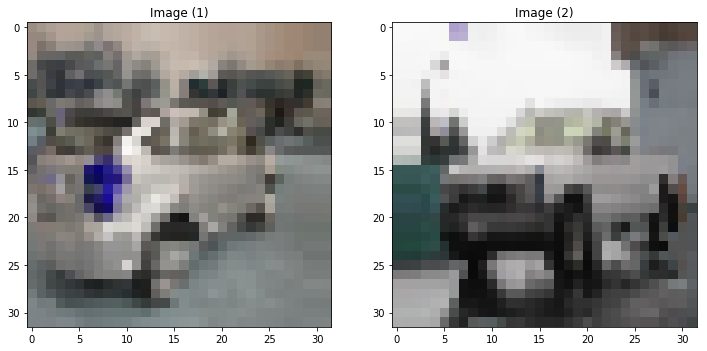



====================Prices==========================
[[9468]
 [2355]]


====================Labels==========================
[0 0]




====================Images==========================
47/85 [===============>..............] - ETA: 20s - loss: 7.9359 - acc: 0.4894

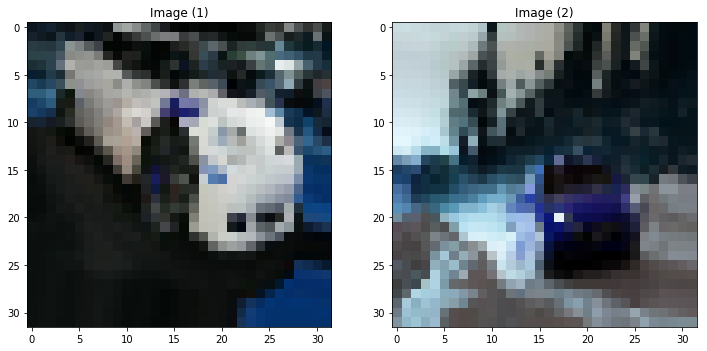



====================Prices==========================
[[318794]
 [674012]]


====================Labels==========================
[1 1]




====================Images==========================
48/85 [===============>..............] - ETA: 20s - loss: 7.7705 - acc: 0.5000

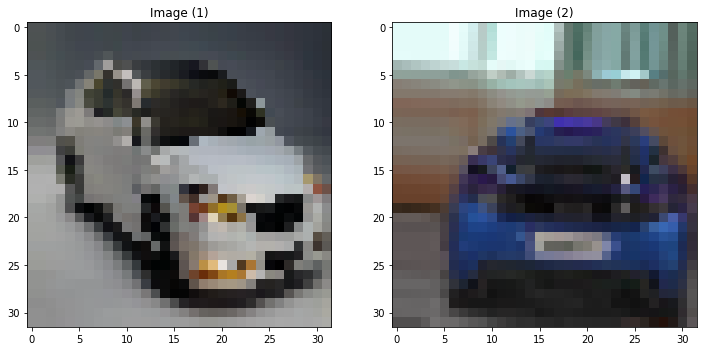



====================Prices==========================
[[  1429]
 [702558]]


====================Labels==========================
[0 1]




====================Images==========================
49/85 [================>.............] - ETA: 19s - loss: 7.7746 - acc: 0.5000

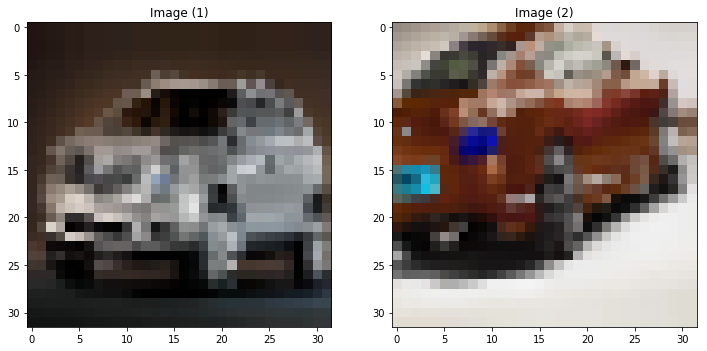



====================Prices==========================
[[273151]
 [330169]]


====================Labels==========================
[1 1]




====================Images==========================
50/85 [================>.............] - ETA: 19s - loss: 7.6192 - acc: 0.5100

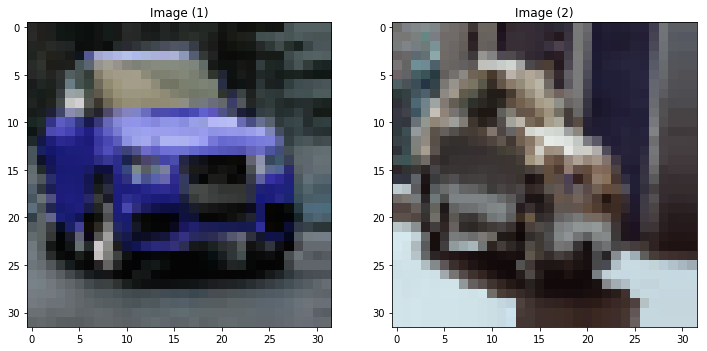



====================Prices==========================
[[131545]
 [  5591]]


====================Labels==========================
[1 0]




====================Images==========================
51/85 [=================>............] - ETA: 18s - loss: 7.6261 - acc: 0.5098

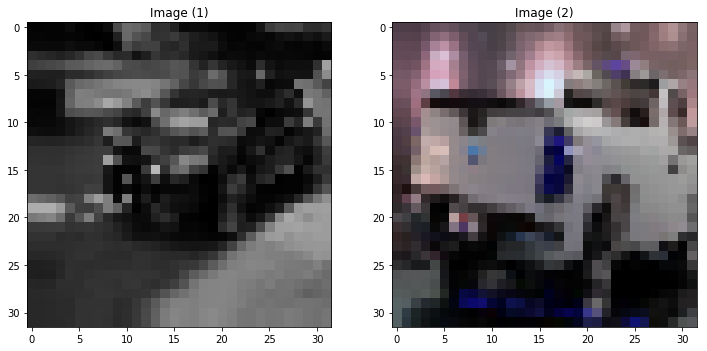



====================Prices==========================
[[786310]
 [   704]]


====================Labels==========================
[1 0]




====================Images==========================
52/85 [=================>............] - ETA: 17s - loss: 7.6327 - acc: 0.5096

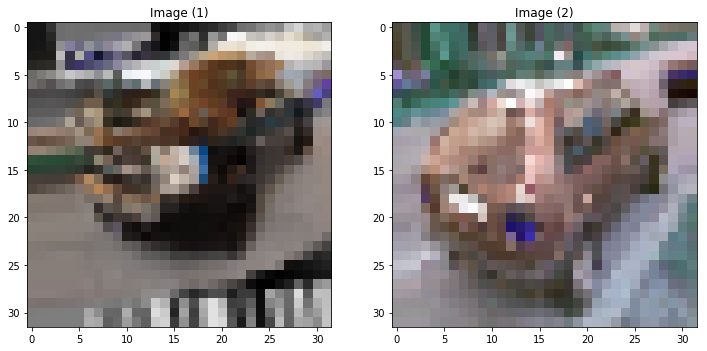



====================Prices==========================
[[6954]
 [9398]]


====================Labels==========================
[0 0]




====================Images==========================
53/85 [=================>............] - ETA: 17s - loss: 7.7895 - acc: 0.5000

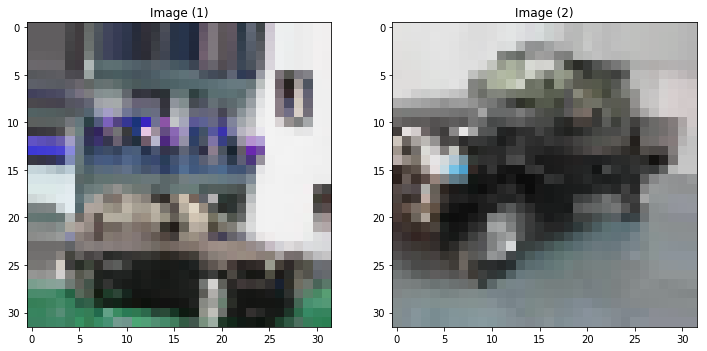



====================Prices==========================
[[1908]
 [5891]]


====================Labels==========================
[0 0]




====================Images==========================
54/85 [==================>...........] - ETA: 16s - loss: 7.9405 - acc: 0.4907

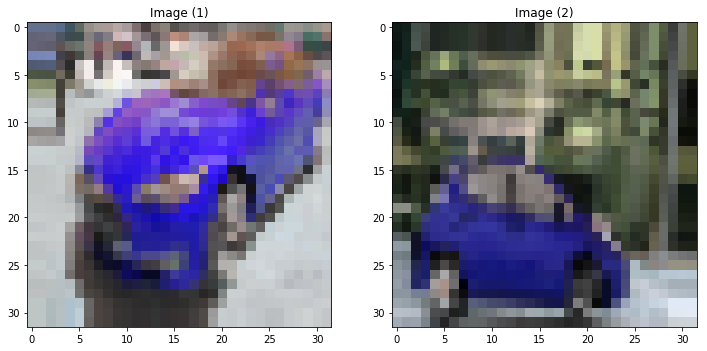



====================Prices==========================
[[6878]
 [2011]]


====================Labels==========================
[0 0]




====================Images==========================
55/85 [==================>...........] - ETA: 16s - loss: 8.0859 - acc: 0.4818

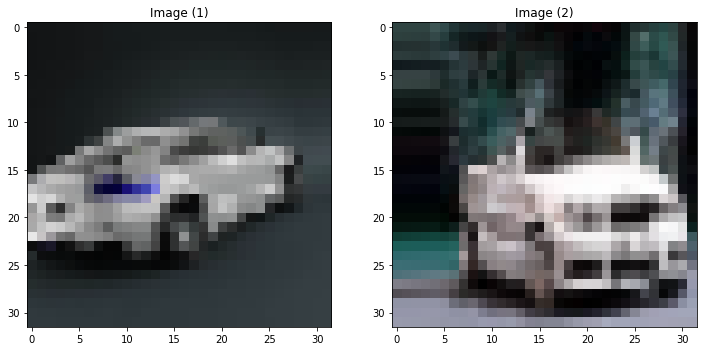



====================Prices==========================
[[960027]
 [  2718]]


====================Labels==========================
[1 0]




====================Images==========================
56/85 [==================>...........] - ETA: 15s - loss: 8.0839 - acc: 0.4821

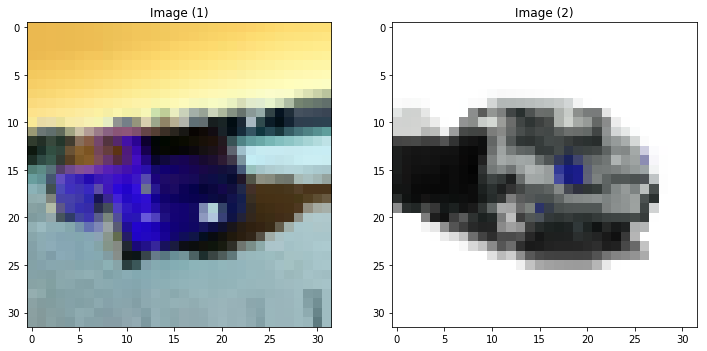



====================Prices==========================
[[872910]
 [993717]]


====================Labels==========================
[1 1]




====================Images==========================
57/85 [===================>..........] - ETA: 15s - loss: 7.9421 - acc: 0.4912

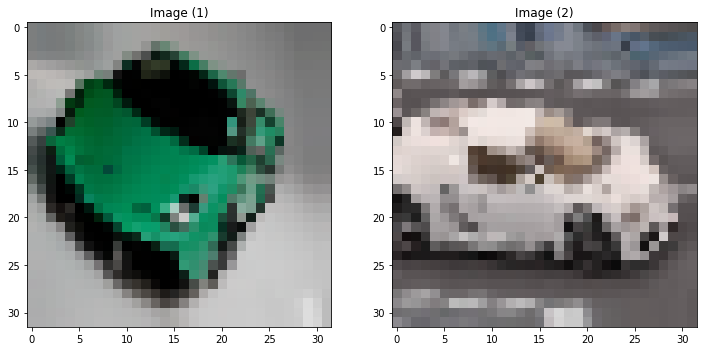



====================Prices==========================
[[ 69730]
 [642855]]


====================Labels==========================
[1 1]




====================Images==========================
58/85 [===================>..........] - ETA: 14s - loss: 7.8051 - acc: 0.5000

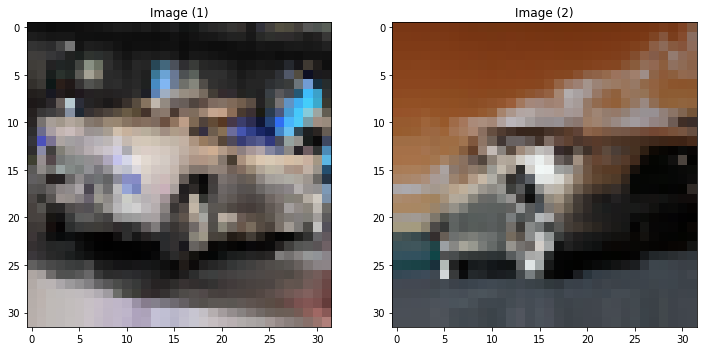



====================Prices==========================
[[966594]
 [524288]]


====================Labels==========================
[1 1]




====================Images==========================
59/85 [===================>..........] - ETA: 14s - loss: 7.6729 - acc: 0.5085

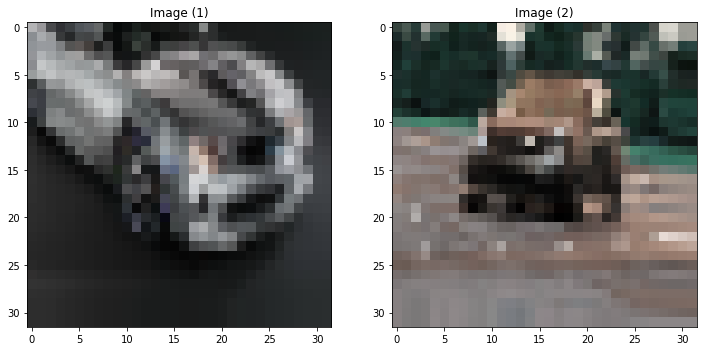



====================Prices==========================
[[507711]
 [  9031]]


====================Labels==========================
[1 0]




====================Images==========================
60/85 [====================>.........] - ETA: 13s - loss: 7.6778 - acc: 0.5083

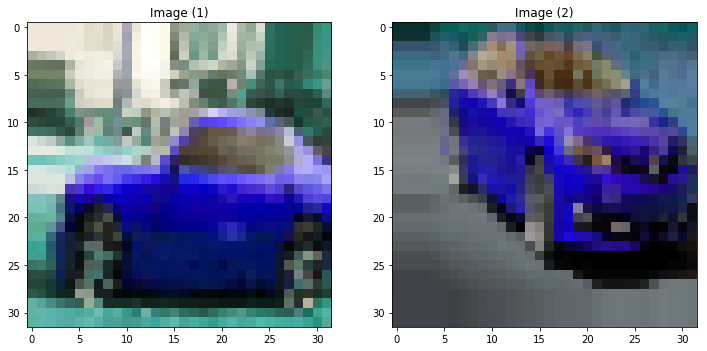



====================Prices==========================
[[741001]
 [  5782]]


====================Labels==========================
[1 0]




====================Images==========================
61/85 [====================>.........] - ETA: 13s - loss: 7.6826 - acc: 0.5082

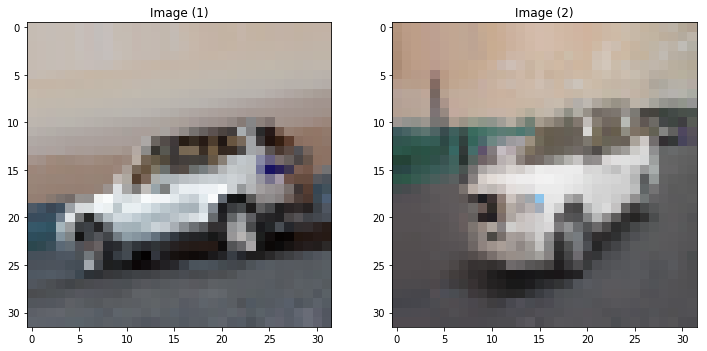



====================Prices==========================
[[5587]
 [ 237]]


====================Labels==========================
[0 0]




====================Images==========================
62/85 [====================>.........] - ETA: 12s - loss: 7.7520 - acc: 0.5000

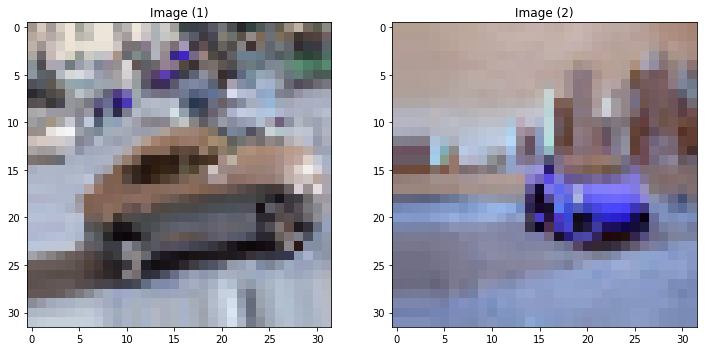



====================Prices==========================
[[943813]
 [394073]]


====================Labels==========================
[1 1]




====================Images==========================
63/85 [=====================>........] - ETA: 11s - loss: 7.6289 - acc: 0.5079

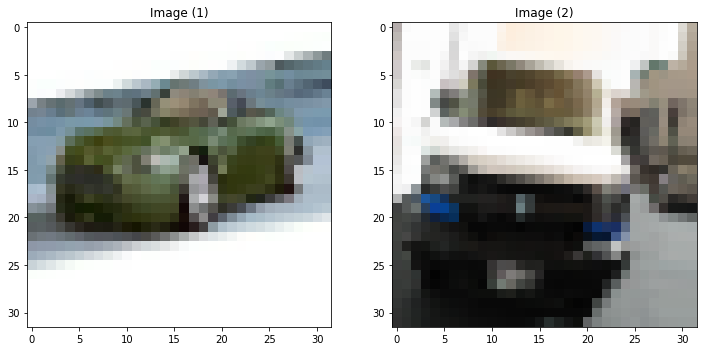



====================Prices==========================
[[674061]
 [  2234]]


====================Labels==========================
[1 0]




====================Images==========================
64/85 [=====================>........] - ETA: 11s - loss: 7.6343 - acc: 0.5078

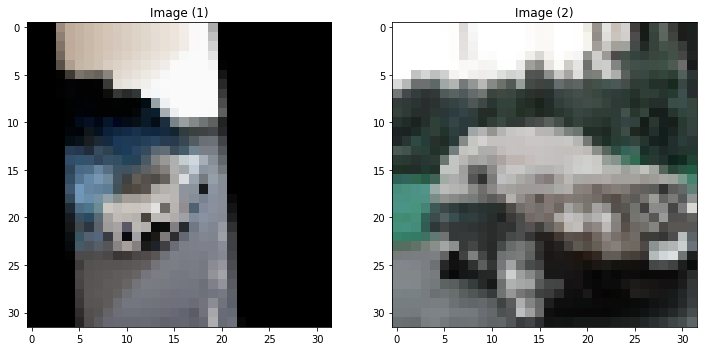



====================Prices==========================
[[710370]
 [797401]]


====================Labels==========================
[1 1]




====================Images==========================
65/85 [=====================>........] - ETA: 10s - loss: 7.5168 - acc: 0.5154

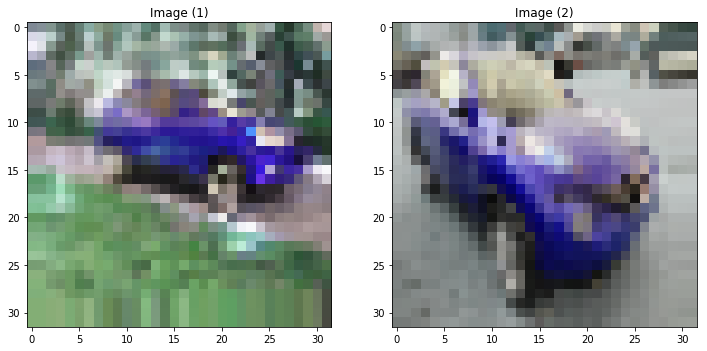



====================Prices==========================
[[3641]
 [8186]]


====================Labels==========================
[0 0]




====================Images==========================
66/85 [======================>.......] - ETA: 10s - loss: 7.6445 - acc: 0.5076

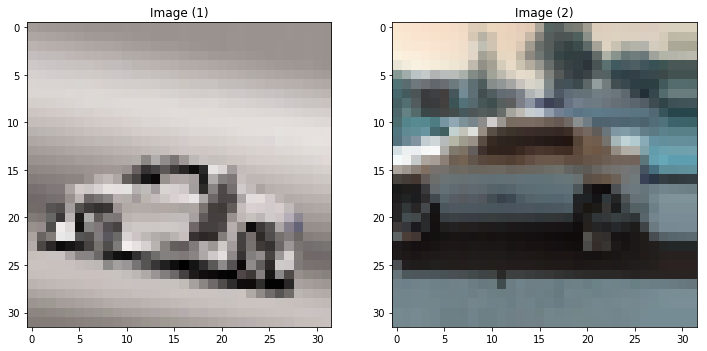



====================Prices==========================
[[962666]
 [  1547]]


====================Labels==========================
[1 0]




====================Images==========================
67/85 [======================>.......] - ETA: 9s - loss: 7.6493 - acc: 0.5075 

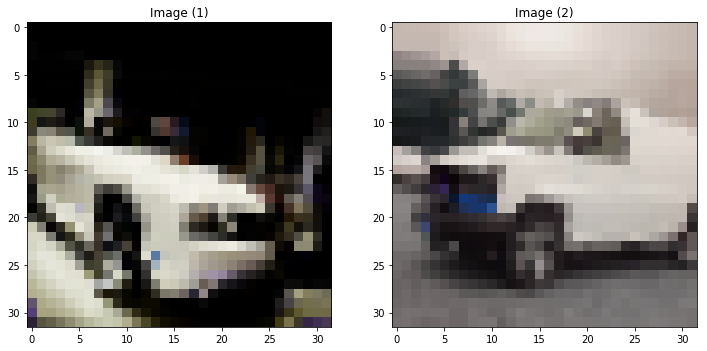



====================Prices==========================
[[267727]
 [  2909]]


====================Labels==========================
[1 0]




====================Images==========================
68/85 [=======================>......] - ETA: 9s - loss: 7.6541 - acc: 0.5074

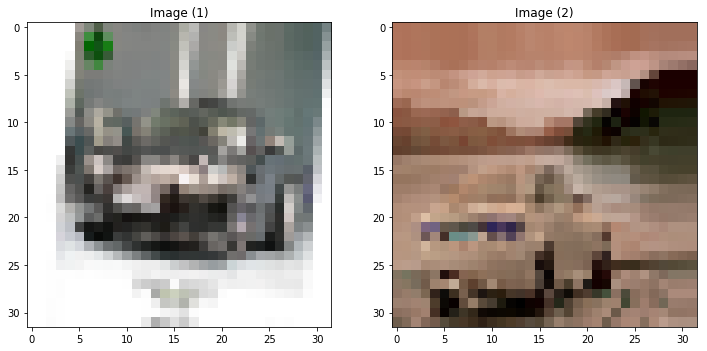



====================Prices==========================
[[874565]
 [  1523]]


====================Labels==========================
[1 0]




====================Images==========================
69/85 [=======================>......] - ETA: 8s - loss: 7.6587 - acc: 0.5072

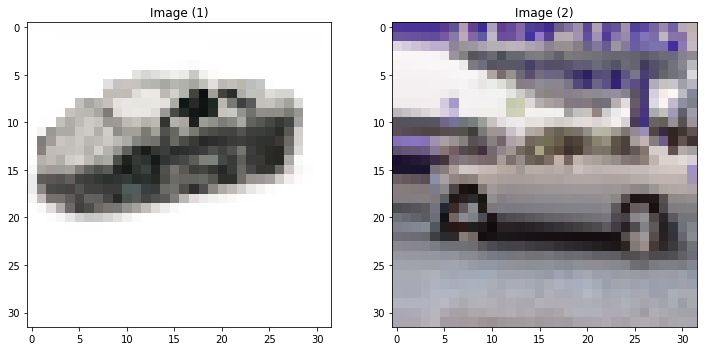



====================Prices==========================
[[857427]
 [   196]]


====================Labels==========================
[1 0]




====================Images==========================
70/85 [=======================>......] - ETA: 8s - loss: 7.5971 - acc: 0.5071

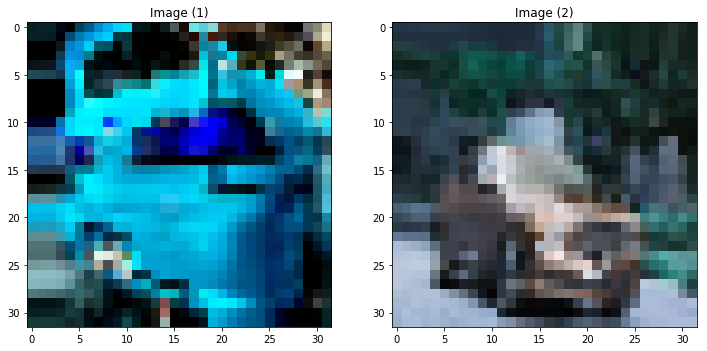



====================Prices==========================
[[7285]
 [9192]]


====================Labels==========================
[0 0]




====================Images==========================
71/85 [========================>.....] - ETA: 7s - loss: 7.7146 - acc: 0.5000

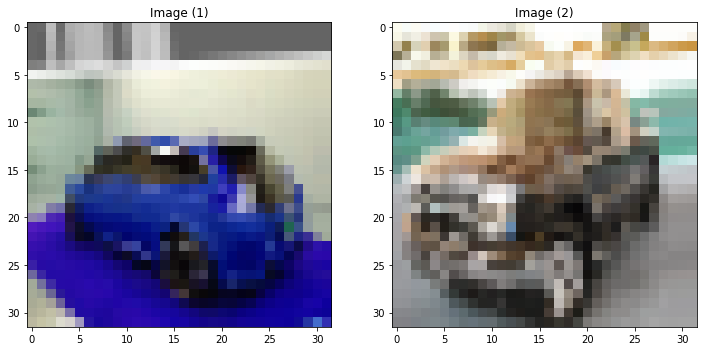



====================Prices==========================
[[4609]
 [2597]]


====================Labels==========================
[0 0]




====================Images==========================
72/85 [========================>.....] - ETA: 6s - loss: 7.8289 - acc: 0.4931

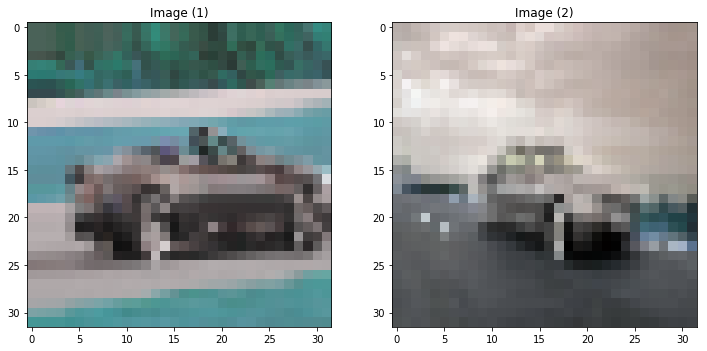



====================Prices==========================
[[195764]
 [752437]]


====================Labels==========================
[1 1]




====================Images==========================
73/85 [========================>.....] - ETA: 6s - loss: 7.7216 - acc: 0.5000

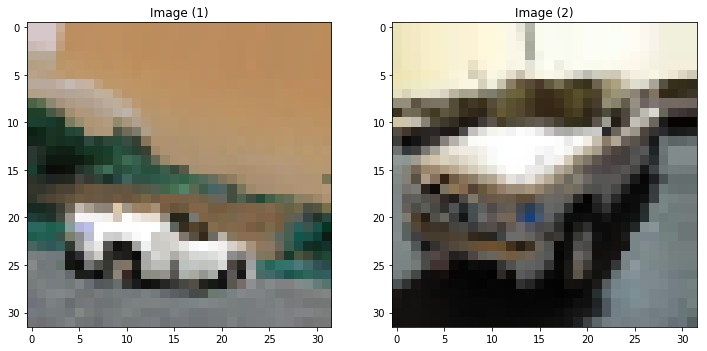



====================Prices==========================
[[872116]
 [   703]]


====================Labels==========================
[1 0]




====================Images==========================
74/85 [=========================>....] - ETA: 5s - loss: 7.7250 - acc: 0.5000

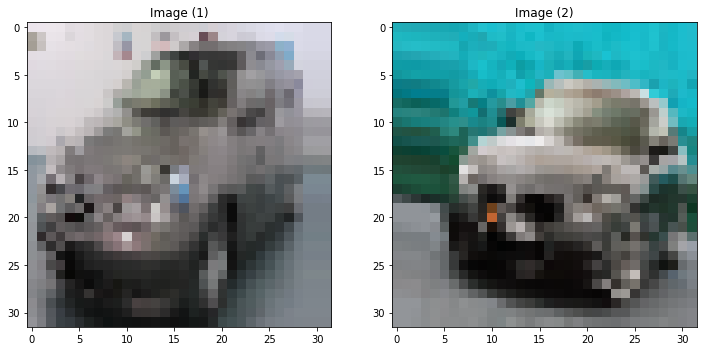



====================Prices==========================
[[  8651]
 [754890]]


====================Labels==========================
[0 1]




====================Images==========================
75/85 [=========================>....] - ETA: 5s - loss: 7.7283 - acc: 0.5000

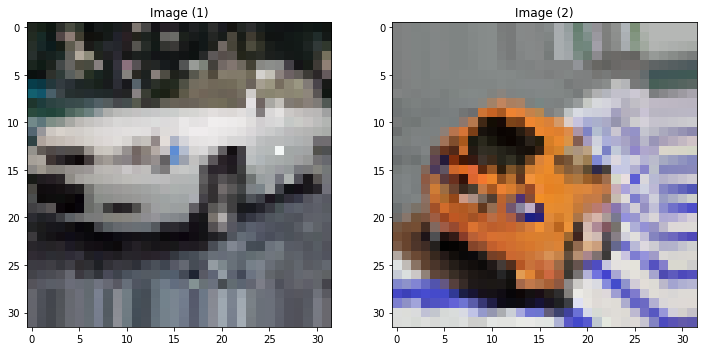



====================Prices==========================
[[  9004]
 [501141]]


====================Labels==========================
[0 1]




====================Images==========================
76/85 [=========================>....] - ETA: 4s - loss: 7.7315 - acc: 0.5000

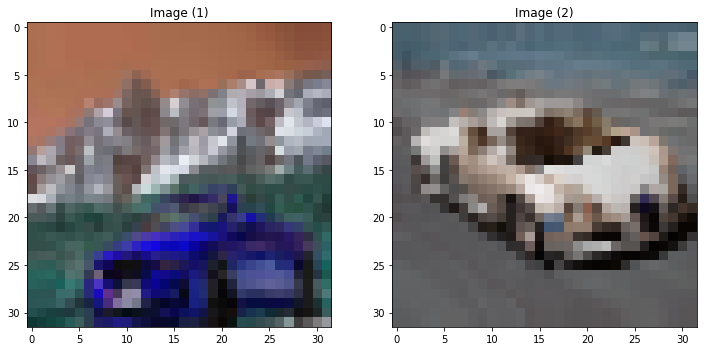



====================Prices==========================
[[ 62004]
 [667923]]


====================Labels==========================
[1 1]




====================Images==========================
77/85 [==========================>...] - ETA: 4s - loss: 7.6311 - acc: 0.5065

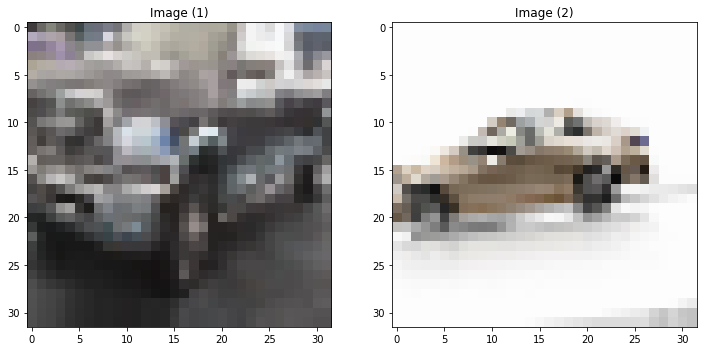



====================Prices==========================
[[2378]
 [3365]]


====================Labels==========================
[0 0]




====================Images==========================
78/85 [==========================>...] - ETA: 3s - loss: 7.7376 - acc: 0.5000

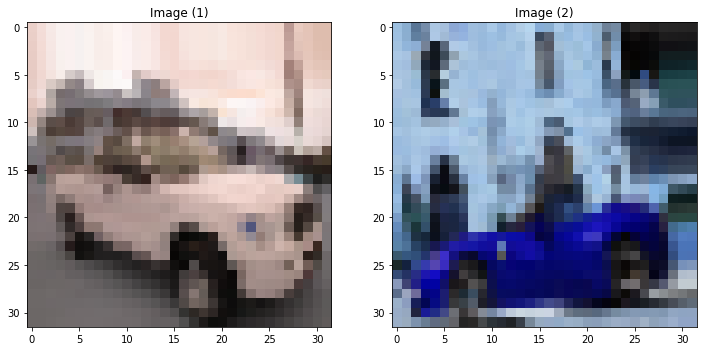



====================Prices==========================
[[  9250]
 [475990]]


====================Labels==========================
[0 1]




====================Images==========================
79/85 [==========================>...] - ETA: 3s - loss: 7.7406 - acc: 0.5000

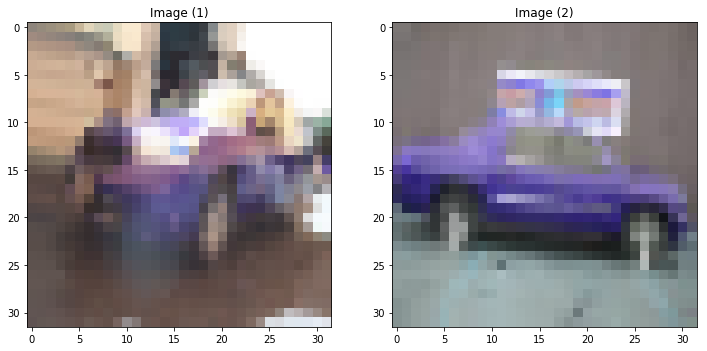



====================Prices==========================
[[ 597]
 [5383]]


====================Labels==========================
[0 0]




====================Images==========================
80/85 [===========================>..] - ETA: 2s - loss: 7.8431 - acc: 0.4938

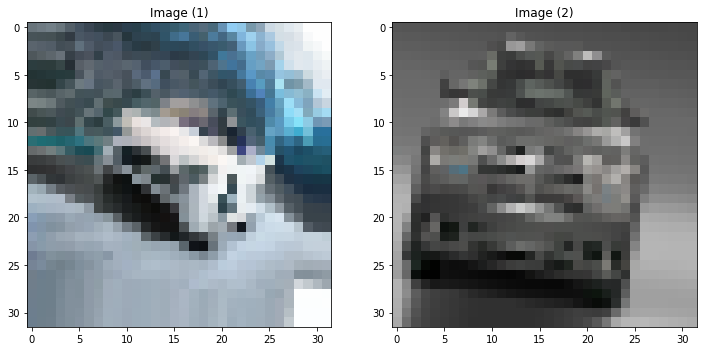



====================Prices==========================
[[147980]
 [  5568]]


====================Labels==========================
[1 0]




====================Images==========================
81/85 [===========================>..] - ETA: 2s - loss: 7.8447 - acc: 0.4938

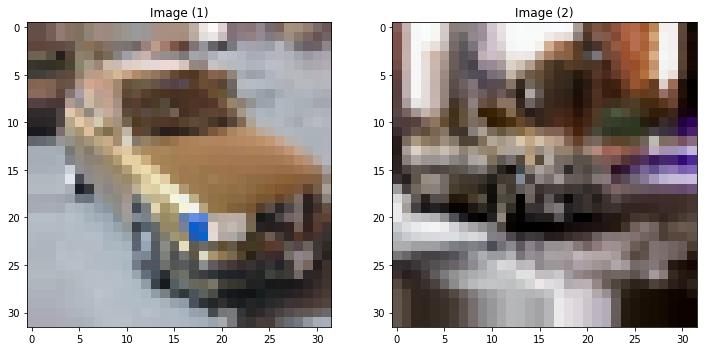



====================Prices==========================
[[  2943]
 [594042]]


====================Labels==========================
[0 1]




====================Images==========================
82/85 [===========================>..] - ETA: 1s - loss: 7.8462 - acc: 0.4939

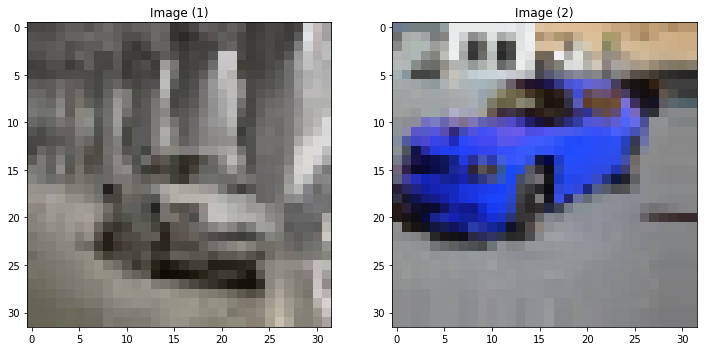



====================Prices==========================
[[864541]
 [201615]]


====================Labels==========================
[1 1]




====================Images==========================
83/85 [============================>.] - ETA: 1s - loss: 7.7517 - acc: 0.5000

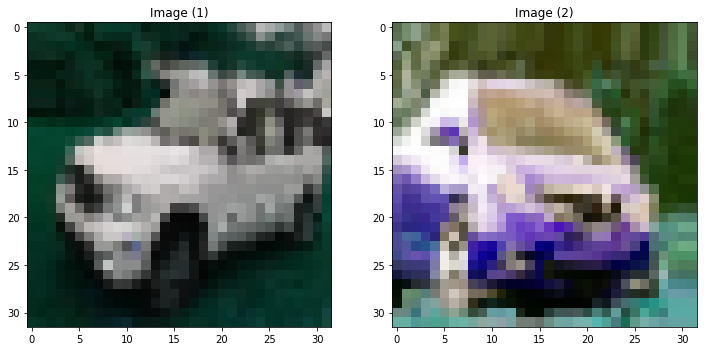



====================Prices==========================
[[2577]
 [1768]]


====================Labels==========================
[0 0]




====================Images==========================
84/85 [============================>.] - ETA: 0s - loss: 7.8492 - acc: 0.4940

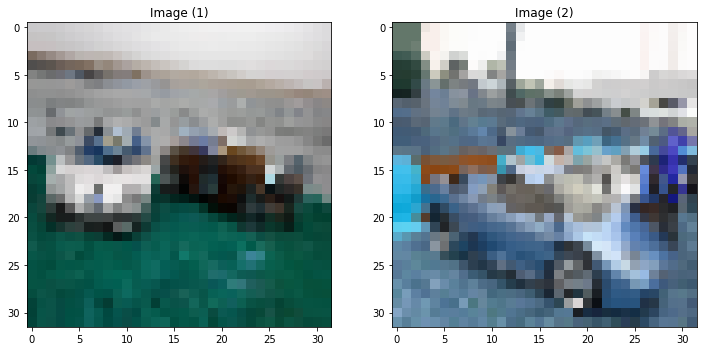



====================Prices==========================
[[120610]
 [898129]]


====================Labels==========================
[1 1]




====================Images==========================
85/85 [==============================] - 46s 539ms/step - loss: 7.7569 - acc: 0.5000 - val_loss: 7.7117 - val_acc: 0.4872
Epoch 2/2


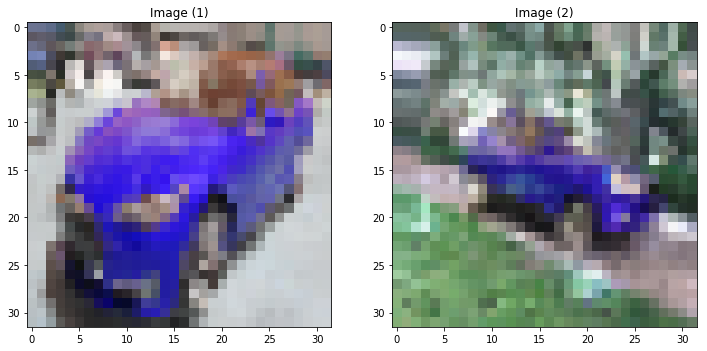



====================Prices==========================
[[6878]
 [3641]]


====================Labels==========================
[0 0]




====================Images==========================
 1/85 [..............................] - ETA: 15s - loss: 15.9424 - acc: 0.0000e+00

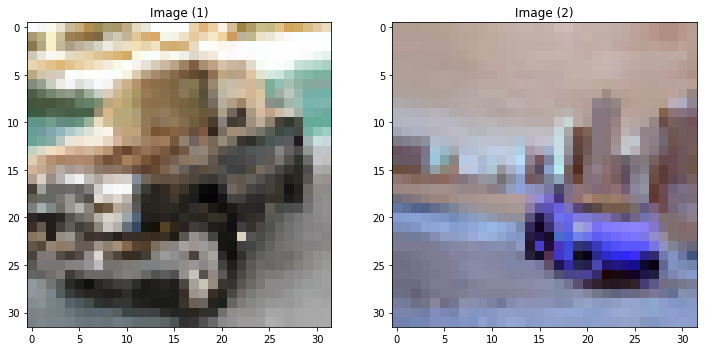



====================Prices==========================
[[  2597]
 [394073]]


====================Labels==========================
[0 1]




====================Images==========================
 2/85 [..............................] - ETA: 43s - loss: 11.9568 - acc: 0.2500    

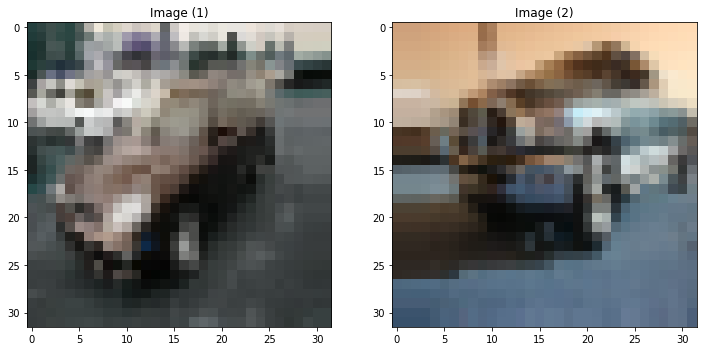



====================Prices==========================
[[4465]
 [5371]]


====================Labels==========================
[0 0]




====================Images==========================
 3/85 [>.............................] - ETA: 42s - loss: 13.2853 - acc: 0.1667

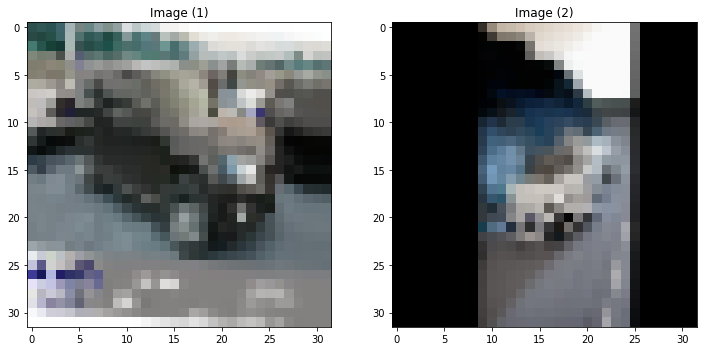



====================Prices==========================
[[  1077]
 [710370]]


====================Labels==========================
[0 1]




====================Images==========================
 4/85 [>.............................] - ETA: 42s - loss: 11.9568 - acc: 0.2500

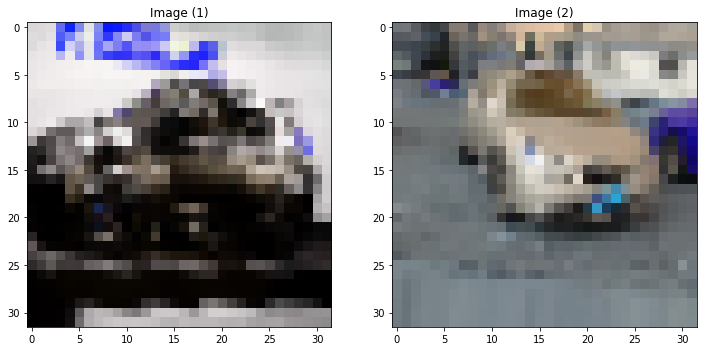



====================Prices==========================
[[437339]
 [  7565]]


====================Labels==========================
[1 0]




====================Images==========================
 5/85 [>.............................] - ETA: 42s - loss: 11.1597 - acc: 0.3000

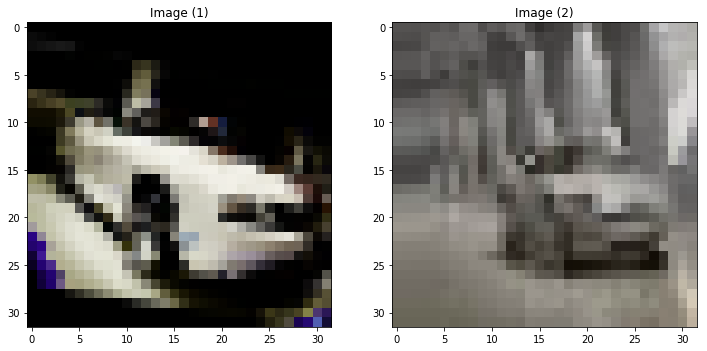



====================Prices==========================
[[267727]
 [864541]]


====================Labels==========================
[1 1]




====================Images==========================
 6/85 [=>............................] - ETA: 41s - loss: 9.2997 - acc: 0.4167 

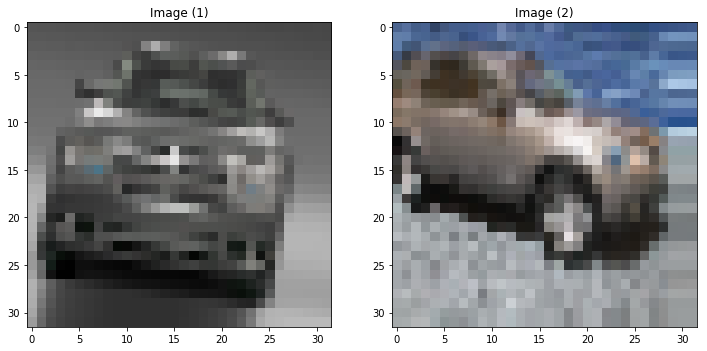



====================Prices==========================
[[5568]
 [9454]]


====================Labels==========================
[0 0]




====================Images==========================
 7/85 [=>............................] - ETA: 40s - loss: 10.2487 - acc: 0.3571

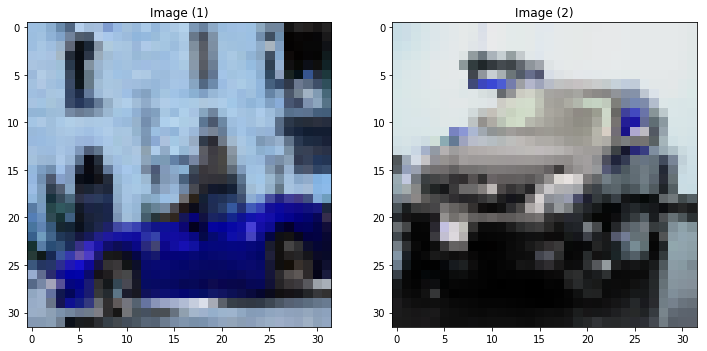



====================Prices==========================
[[475990]
 [  2358]]


====================Labels==========================
[1 0]




====================Images==========================
 8/85 [=>............................] - ETA: 39s - loss: 9.9640 - acc: 0.3750 

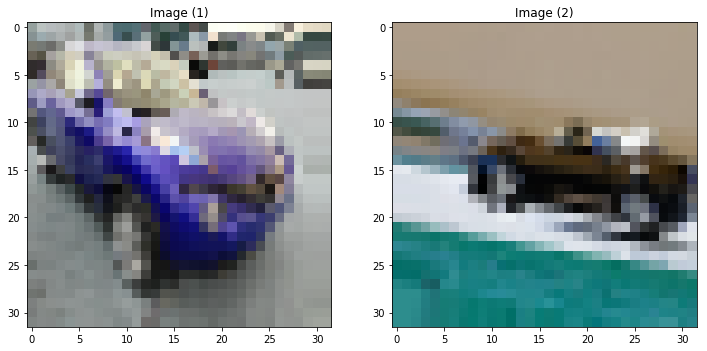



====================Prices==========================
[[  8186]
 [139177]]


====================Labels==========================
[0 1]




====================Images==========================
 9/85 [==>...........................] - ETA: 38s - loss: 9.7426 - acc: 0.3889

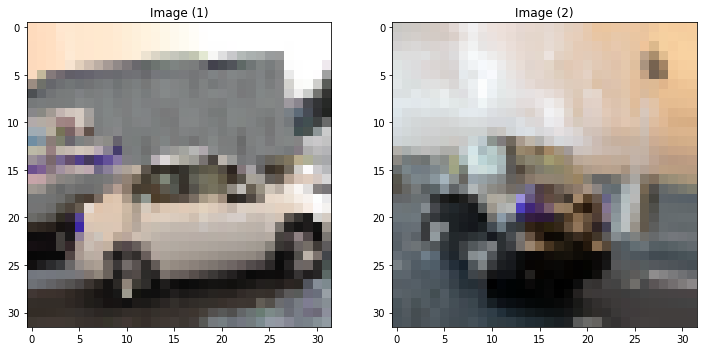



====================Prices==========================
[[  8486]
 [488051]]


====================Labels==========================
[0 1]




====================Images==========================
10/85 [==>...........................] - ETA: 37s - loss: 9.5654 - acc: 0.4000

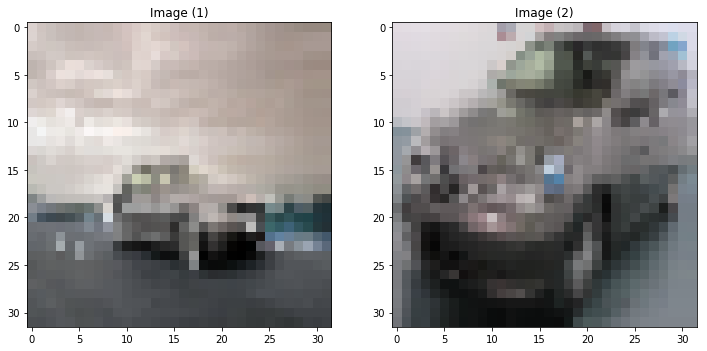



====================Prices==========================
[[752437]
 [  8651]]


====================Labels==========================
[1 0]




====================Images==========================
11/85 [==>...........................] - ETA: 37s - loss: 9.4205 - acc: 0.4091

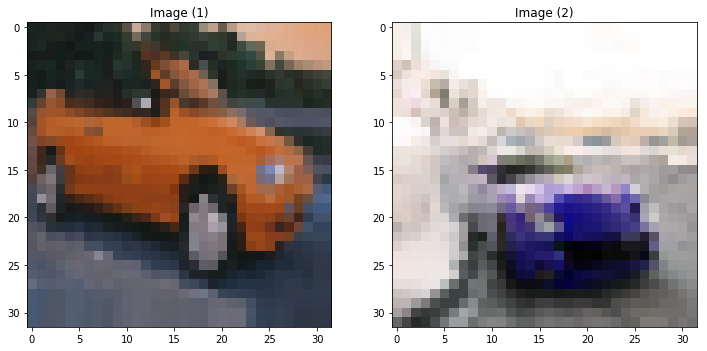



====================Prices==========================
[[  4347]
 [811858]]


====================Labels==========================
[0 1]




====================Images==========================
12/85 [===>..........................] - ETA: 36s - loss: 9.2997 - acc: 0.4167

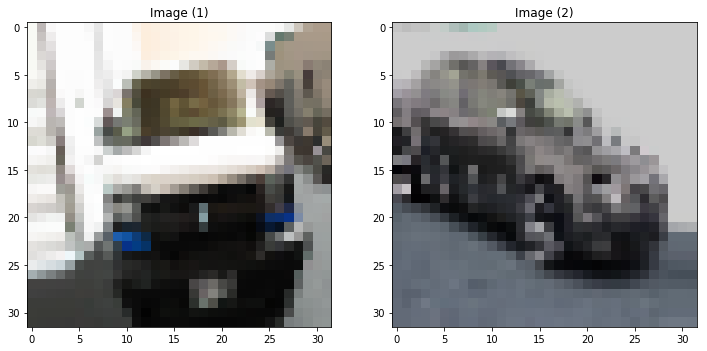



====================Prices==========================
[[2234]
 [8831]]


====================Labels==========================
[0 0]




====================Images==========================
13/85 [===>..........................] - ETA: 36s - loss: 9.8107 - acc: 0.3846

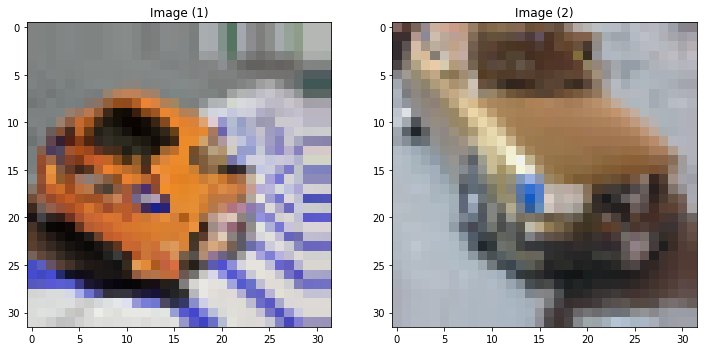



====================Prices==========================
[[501141]
 [  2943]]


====================Labels==========================
[1 0]




====================Images==========================
14/85 [===>..........................] - ETA: 36s - loss: 9.6793 - acc: 0.3929

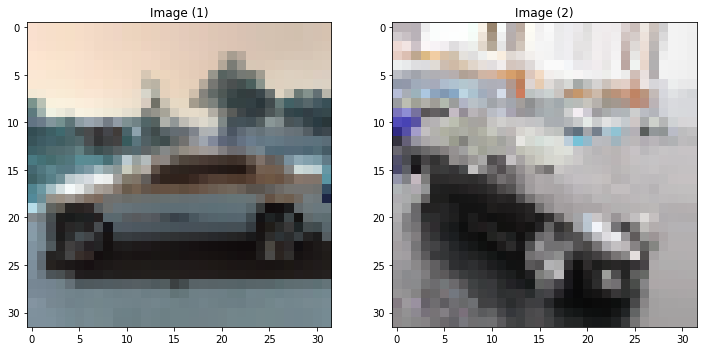



====================Prices==========================
[[1547]
 [6798]]


====================Labels==========================
[0 0]




====================Images==========================
15/85 [====>.........................] - ETA: 36s - loss: 10.0968 - acc: 0.3667

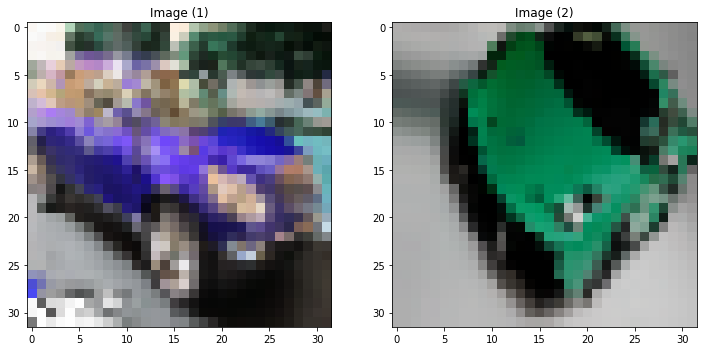



====================Prices==========================
[[ 3942]
 [69730]]


====================Labels==========================
[0 1]




====================Images==========================
16/85 [====>.........................] - ETA: 36s - loss: 9.9640 - acc: 0.3750 

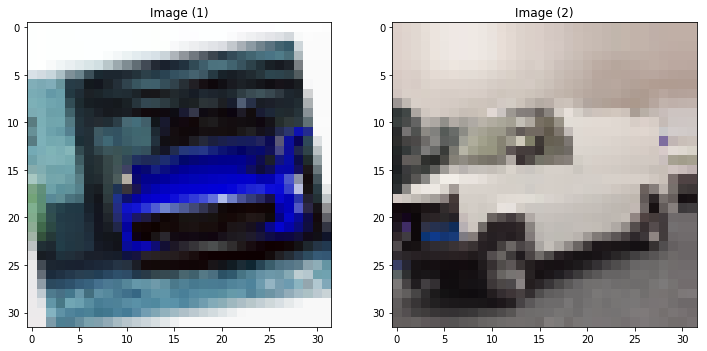



====================Prices==========================
[[242291]
 [  2909]]


====================Labels==========================
[1 0]




====================Images==========================
17/85 [=====>........................] - ETA: 35s - loss: 9.8468 - acc: 0.3824

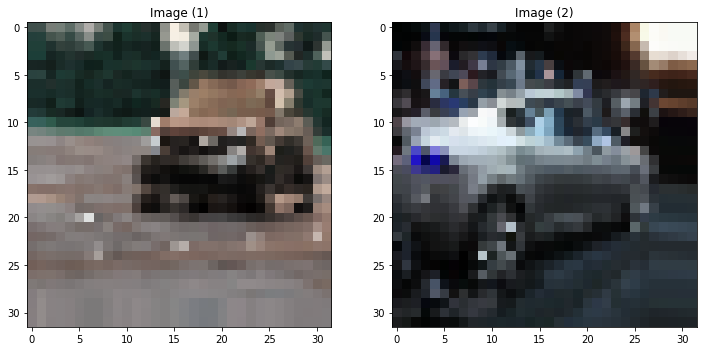



====================Prices==========================
[[ 9031]
 [20197]]


====================Labels==========================
[0 1]




====================Images==========================
18/85 [=====>........................] - ETA: 35s - loss: 9.7426 - acc: 0.3889

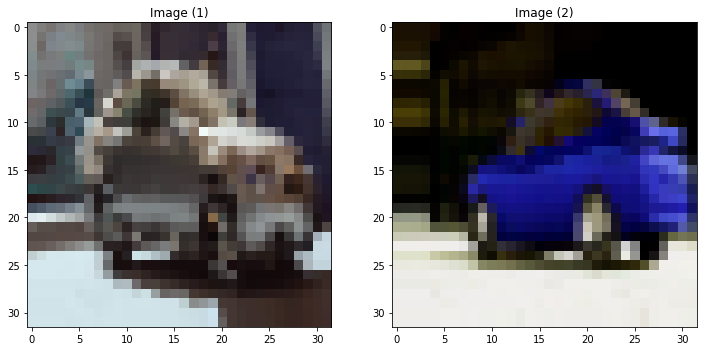



====================Prices==========================
[[5591]
 [6663]]


====================Labels==========================
[0 0]




====================Images==========================
19/85 [=====>........................] - ETA: 34s - loss: 10.0689 - acc: 0.3684

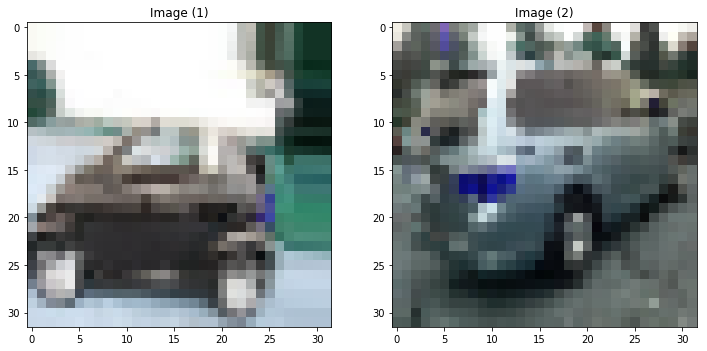



====================Prices==========================
[[3800]
 [6631]]


====================Labels==========================
[0 0]




====================Images==========================
20/85 [======>.......................] - ETA: 34s - loss: 10.3626 - acc: 0.3500

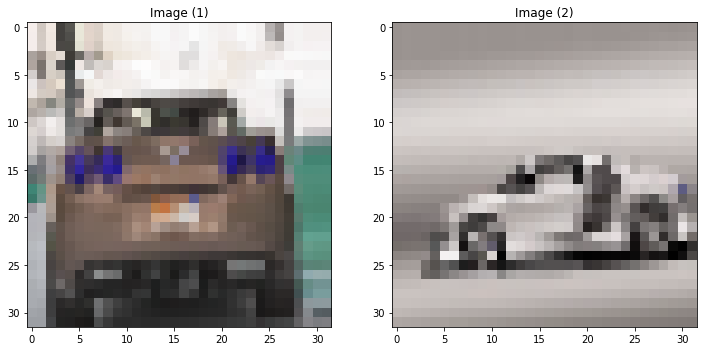



====================Prices==========================
[[944072]
 [962666]]


====================Labels==========================
[1 1]




====================Images==========================
21/85 [======>.......................] - ETA: 33s - loss: 9.8691 - acc: 0.3810 

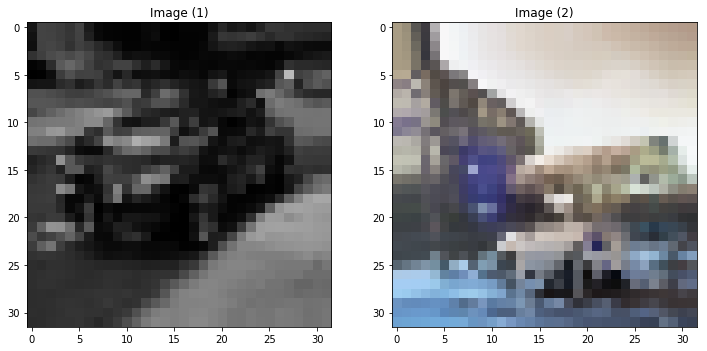



====================Prices==========================
[[786310]
 [  6230]]


====================Labels==========================
[1 0]




====================Images==========================
22/85 [======>.......................] - ETA: 32s - loss: 9.7828 - acc: 0.3864

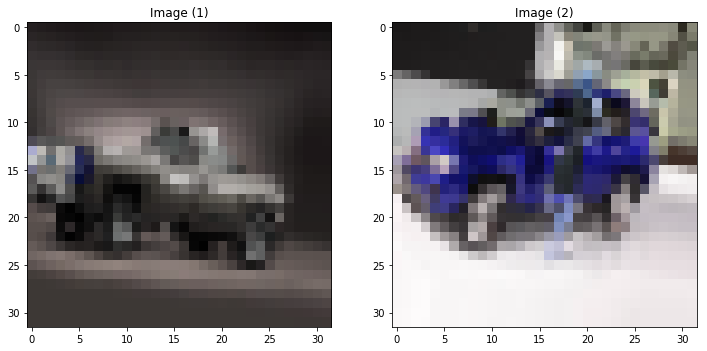



====================Prices==========================
[[1596]
 [2567]]


====================Labels==========================
[0 0]




====================Images==========================
23/85 [=======>......................] - ETA: 32s - loss: 10.0506 - acc: 0.3696

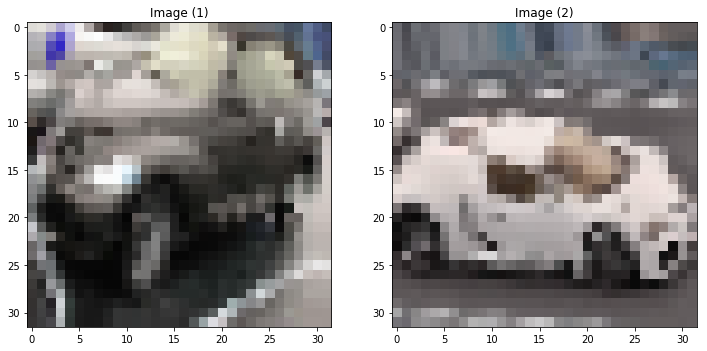



====================Prices==========================
[[  2987]
 [642855]]


====================Labels==========================
[0 1]




====================Images==========================
24/85 [=======>......................] - ETA: 31s - loss: 9.9640 - acc: 0.3750 

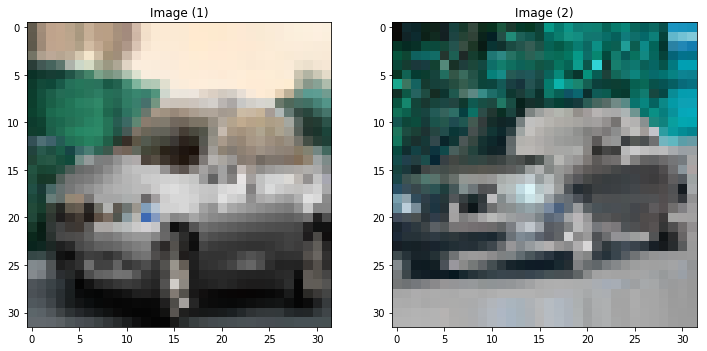



====================Prices==========================
[[  2866]
 [924721]]


====================Labels==========================
[0 1]




====================Images==========================
25/85 [=======>......................] - ETA: 31s - loss: 9.8843 - acc: 0.3800

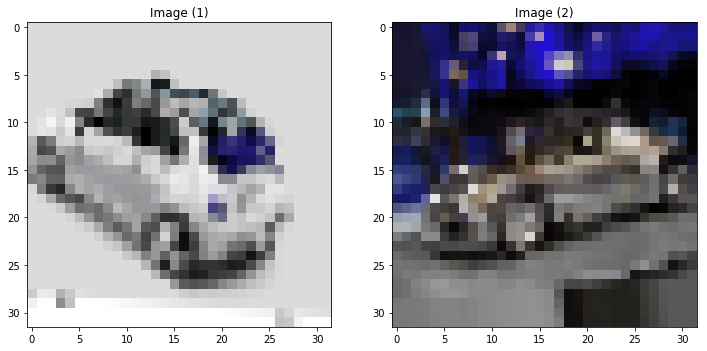



====================Prices==========================
[[  2859]
 [982190]]


====================Labels==========================
[0 1]




====================Images==========================
26/85 [========>.....................] - ETA: 30s - loss: 9.8107 - acc: 0.3846

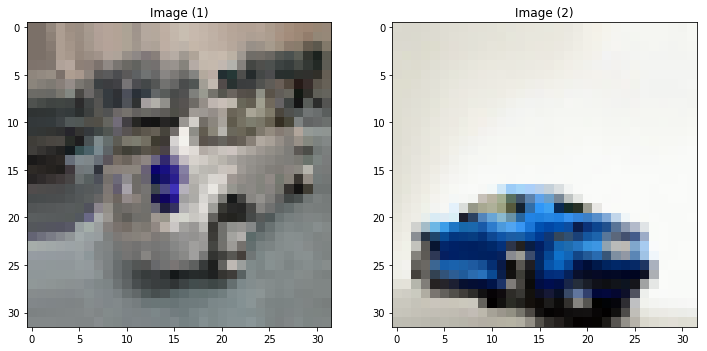



====================Prices==========================
[[  9468]
 [990521]]


====================Labels==========================
[0 1]




====================Images==========================
27/85 [========>.....................] - ETA: 30s - loss: 9.7426 - acc: 0.3889

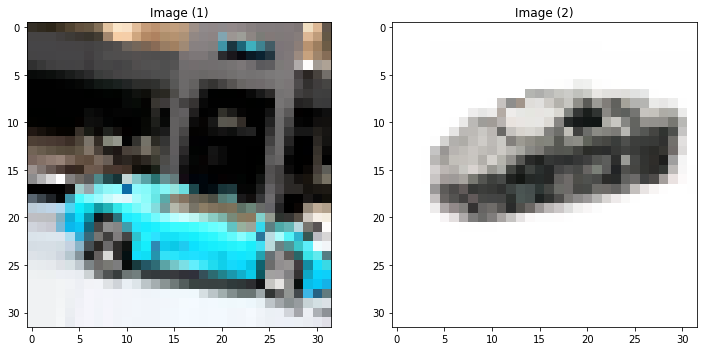



====================Prices==========================
[[943462]
 [857427]]


====================Labels==========================
[1 1]




====================Images==========================
28/85 [========>.....................] - ETA: 30s - loss: 9.3946 - acc: 0.4107

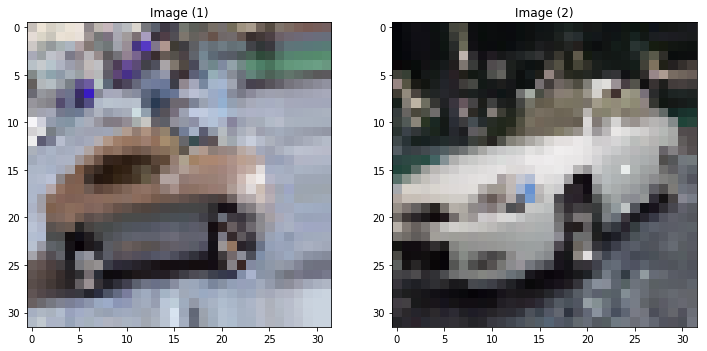



====================Prices==========================
[[943813]
 [  9004]]


====================Labels==========================
[1 0]




====================Images==========================
29/85 [=========>....................] - ETA: 29s - loss: 9.3455 - acc: 0.4138

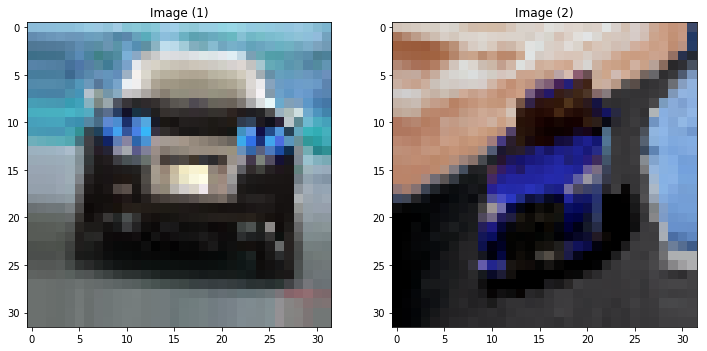



====================Prices==========================
[[255762]
 [  2430]]


====================Labels==========================
[1 0]




====================Images==========================
30/85 [=========>....................] - ETA: 29s - loss: 9.2997 - acc: 0.4167

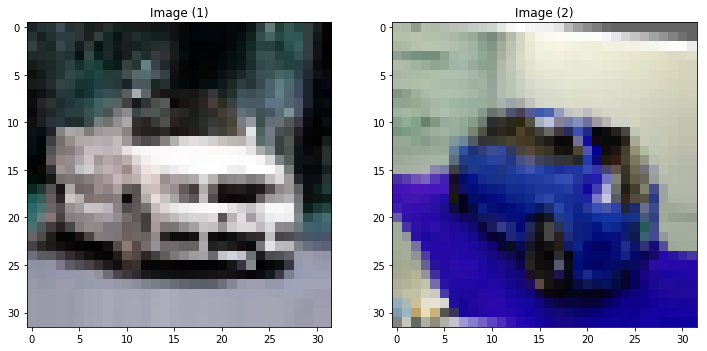



====================Prices==========================
[[2718]
 [4609]]


====================Labels==========================
[0 0]




====================Images==========================
31/85 [=========>....................] - ETA: 28s - loss: 9.5140 - acc: 0.4032

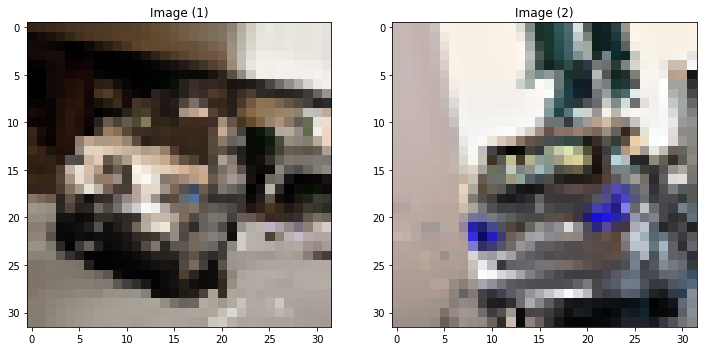



====================Prices==========================
[[7293]
 [9007]]


====================Labels==========================
[0 0]




====================Images==========================
32/85 [==========>...................] - ETA: 28s - loss: 9.7149 - acc: 0.3906

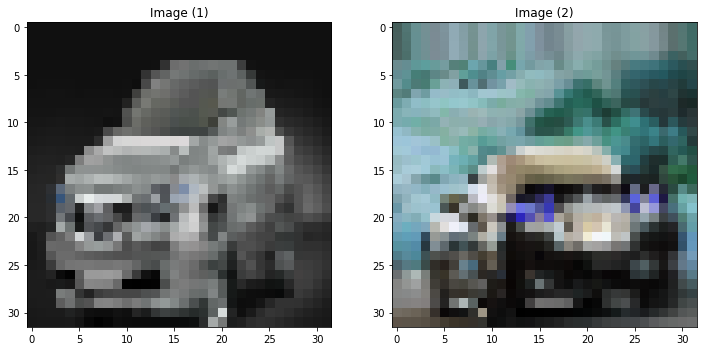



====================Prices==========================
[[    22]
 [808864]]


====================Labels==========================
[0 1]




====================Images==========================
33/85 [==========>...................] - ETA: 27s - loss: 9.4304 - acc: 0.4091

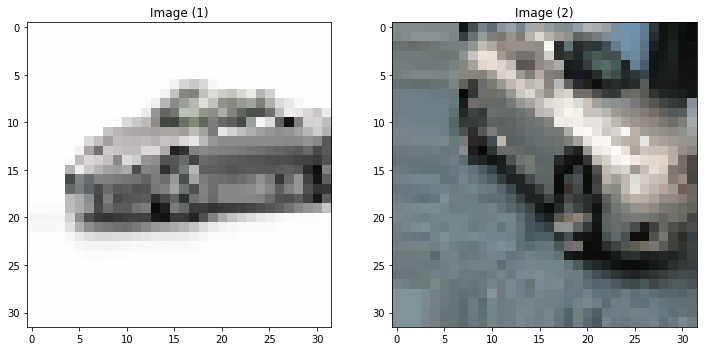



====================Prices==========================
[[435346]
 [687336]]


====================Labels==========================
[1 1]




====================Images==========================
34/85 [===========>..................] - ETA: 27s - loss: 9.1531 - acc: 0.4265

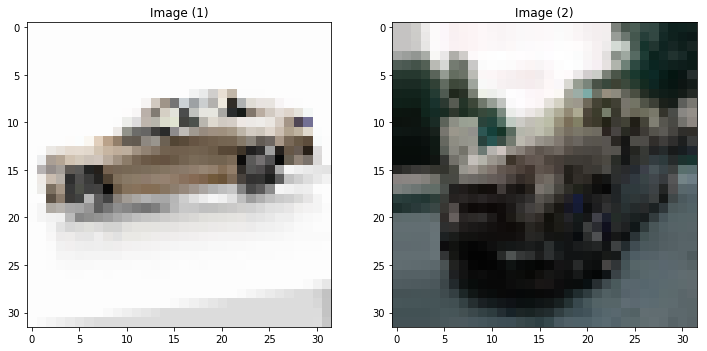



====================Prices==========================
[[  3365]
 [730904]]


====================Labels==========================
[0 1]




====================Images==========================
35/85 [===========>..................] - ETA: 26s - loss: 9.1193 - acc: 0.4286

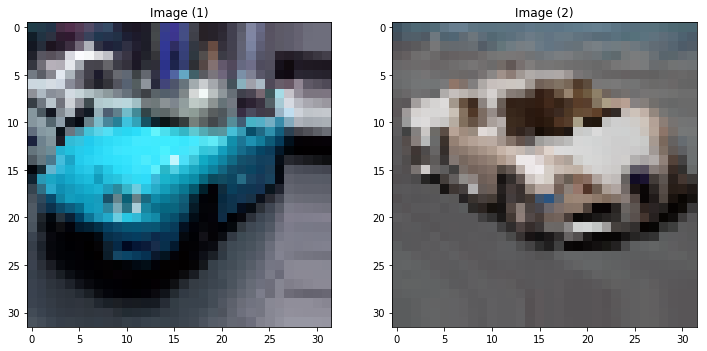



====================Prices==========================
[[   403]
 [667923]]


====================Labels==========================
[0 1]




====================Images==========================
36/85 [===========>..................] - ETA: 25s - loss: 9.0214 - acc: 0.4306

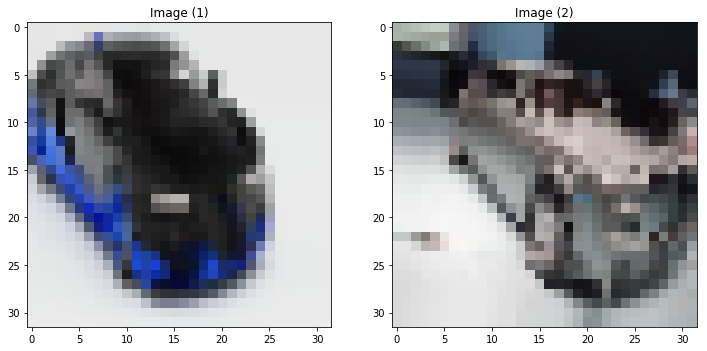



====================Prices==========================
[[412084]
 [515991]]


====================Labels==========================
[1 1]




====================Images==========================
37/85 [============>.................] - ETA: 25s - loss: 8.7776 - acc: 0.4459

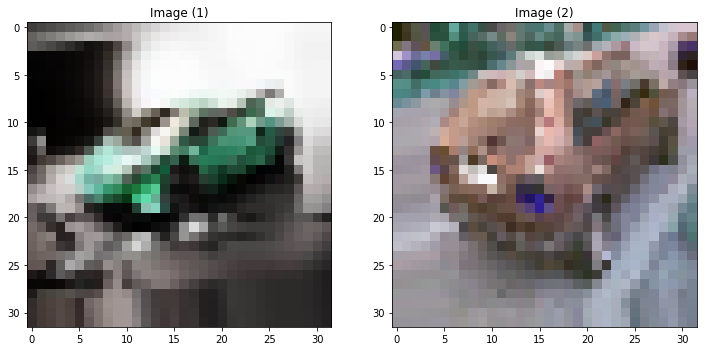



====================Prices==========================
[[210950]
 [  9398]]


====================Labels==========================
[1 0]




====================Images==========================
38/85 [============>.................] - ETA: 24s - loss: 8.7564 - acc: 0.4474

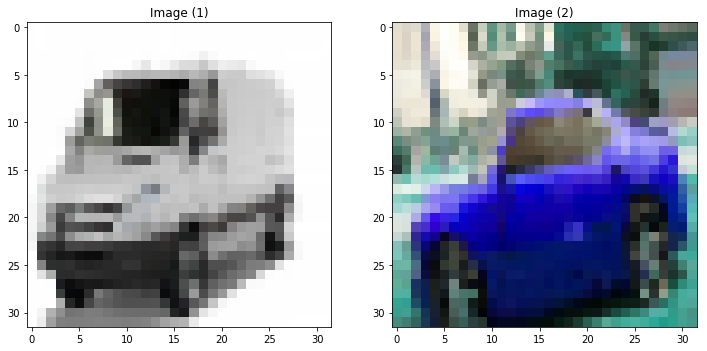



====================Prices==========================
[[  2620]
 [741001]]


====================Labels==========================
[0 1]




====================Images==========================
39/85 [============>.................] - ETA: 24s - loss: 8.7362 - acc: 0.4487

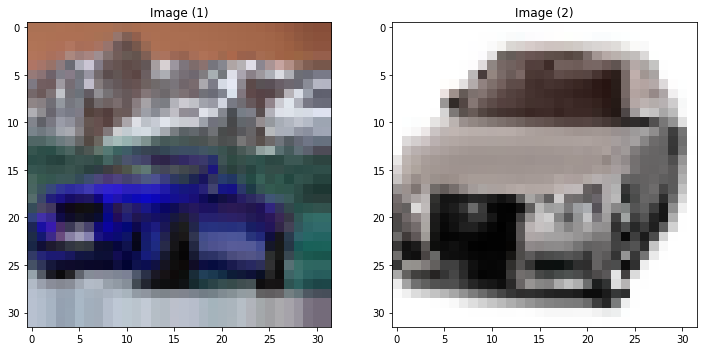



====================Prices==========================
[[ 62004]
 [277451]]


====================Labels==========================
[1 1]




====================Images==========================
40/85 [=============>................] - ETA: 23s - loss: 8.5178 - acc: 0.4625

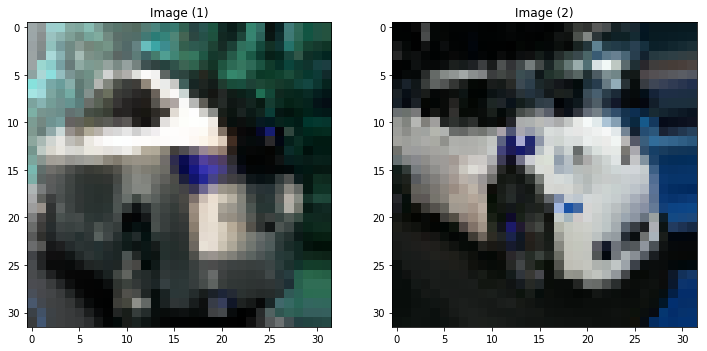



====================Prices==========================
[[552650]
 [318794]]


====================Labels==========================
[1 1]




====================Images==========================
41/85 [=============>................] - ETA: 23s - loss: 8.3101 - acc: 0.4756

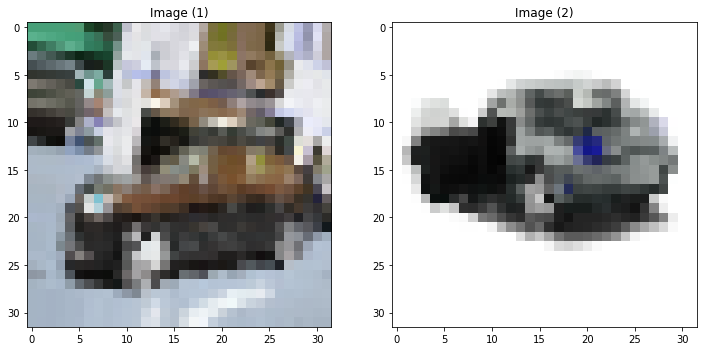



====================Prices==========================
[[  4294]
 [993717]]


====================Labels==========================
[0 1]




====================Images==========================
42/85 [=============>................] - ETA: 22s - loss: 8.3020 - acc: 0.4762

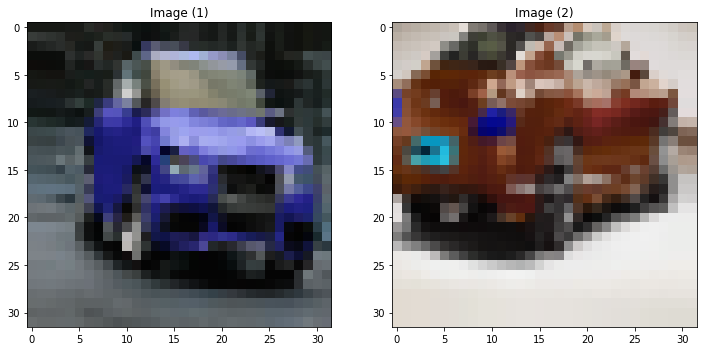



====================Prices==========================
[[131545]
 [330169]]


====================Labels==========================
[1 1]




====================Images==========================
43/85 [==============>...............] - ETA: 22s - loss: 8.1089 - acc: 0.4884

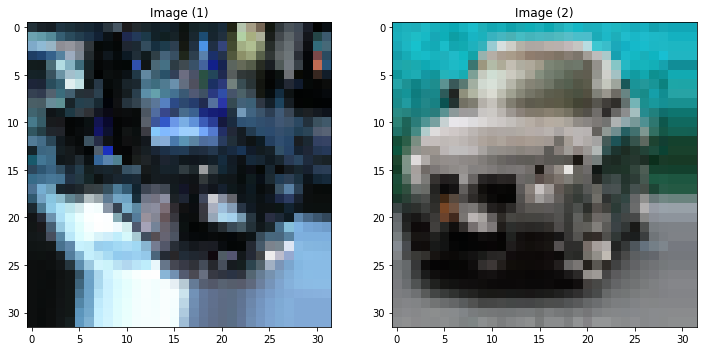



====================Prices==========================
[[643521]
 [754890]]


====================Labels==========================
[1 1]




====================Images==========================
44/85 [==============>...............] - ETA: 21s - loss: 7.9246 - acc: 0.5000

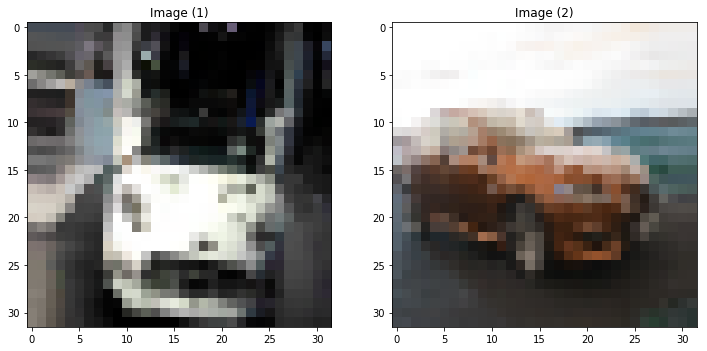



====================Prices==========================
[[311904]
 [  4099]]


====================Labels==========================
[1 0]




====================Images==========================
45/85 [==============>...............] - ETA: 21s - loss: 7.9257 - acc: 0.5000

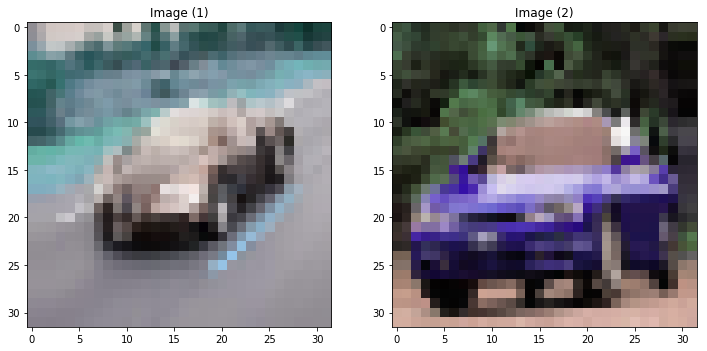



====================Prices==========================
[[940192]
 [  6525]]


====================Labels==========================
[1 0]




====================Images==========================
46/85 [===============>..............] - ETA: 20s - loss: 7.9267 - acc: 0.5000

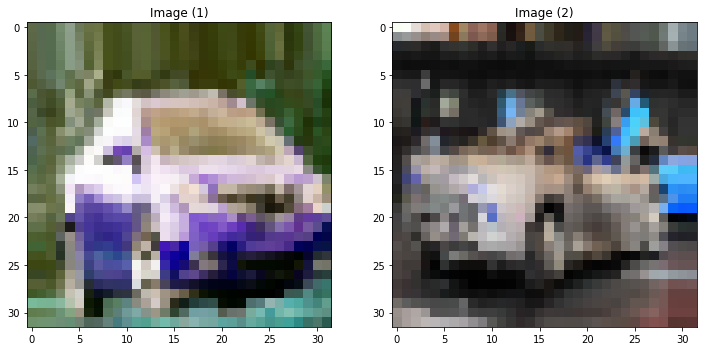



====================Prices==========================
[[  1768]
 [966594]]


====================Labels==========================
[0 1]




====================Images==========================
47/85 [===============>..............] - ETA: 20s - loss: 7.9276 - acc: 0.5000

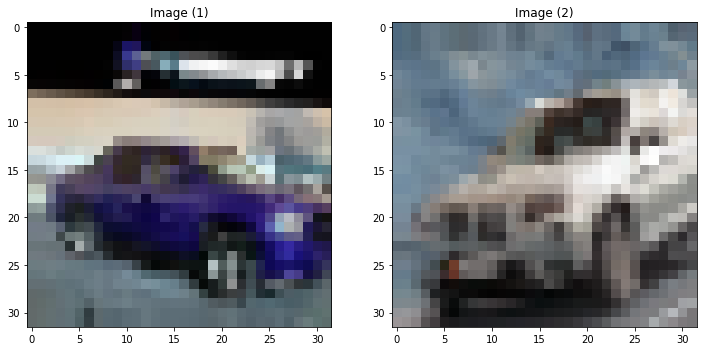



====================Prices==========================
[[5925]
 [3126]]


====================Labels==========================
[0 0]




====================Images==========================
48/85 [===============>..............] - ETA: 19s - loss: 8.0946 - acc: 0.4896

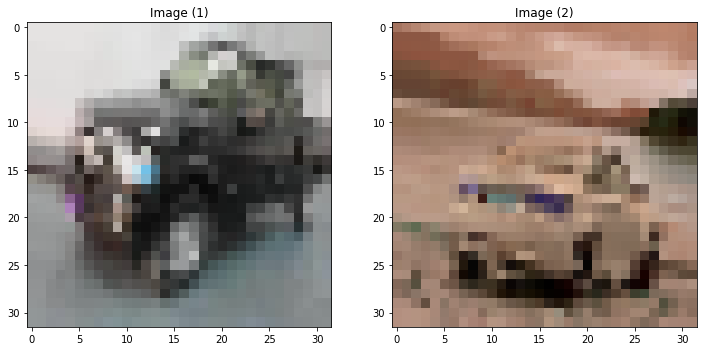



====================Prices==========================
[[5891]
 [1523]]


====================Labels==========================
[0 0]




====================Images==========================
49/85 [================>.............] - ETA: 18s - loss: 8.2547 - acc: 0.4796

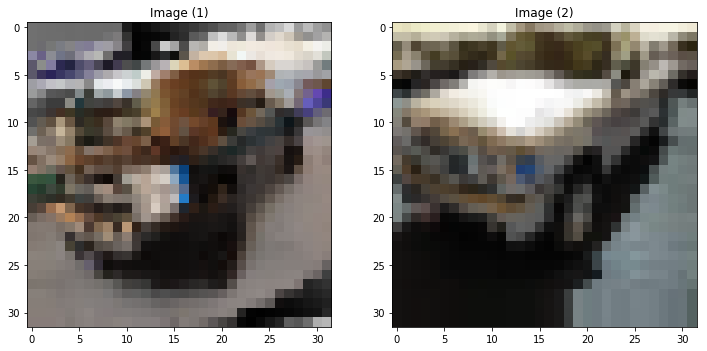



====================Prices==========================
[[6954]
 [ 703]]


====================Labels==========================
[0 0]




====================Images==========================
50/85 [================>.............] - ETA: 18s - loss: 8.3924 - acc: 0.4700

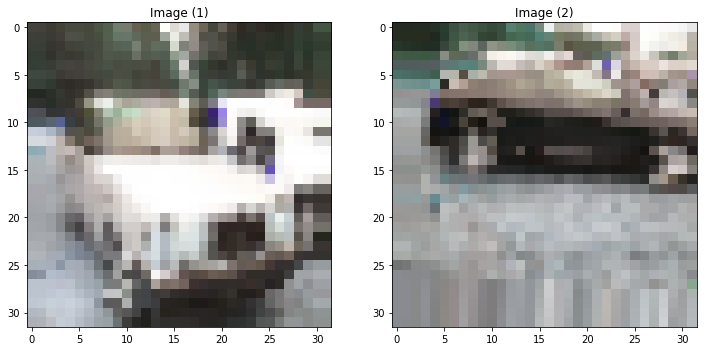



====================Prices==========================
[[7136]
 [9832]]


====================Labels==========================
[0 0]




====================Images==========================
51/85 [=================>............] - ETA: 17s - loss: 8.5404 - acc: 0.4608

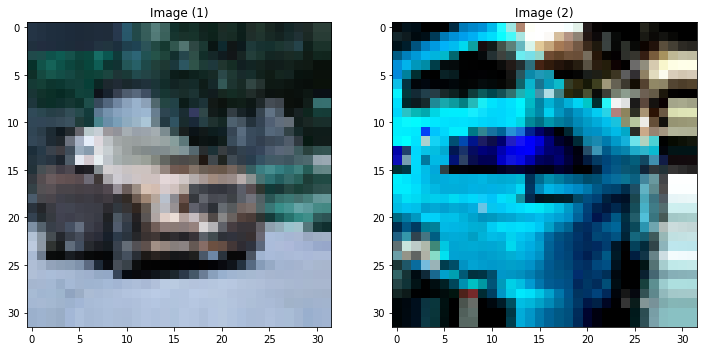



====================Prices==========================
[[9192]
 [7285]]


====================Labels==========================
[0 0]




====================Images==========================
52/85 [=================>............] - ETA: 17s - loss: 8.6828 - acc: 0.4519

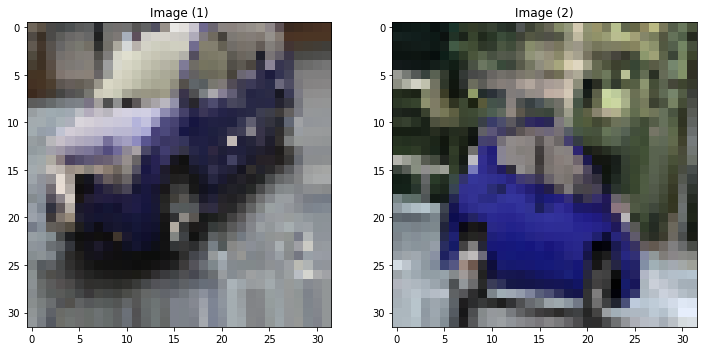



====================Prices==========================
[[6032]
 [2011]]


====================Labels==========================
[0 0]




====================Images==========================
53/85 [=================>............] - ETA: 16s - loss: 8.8198 - acc: 0.4434

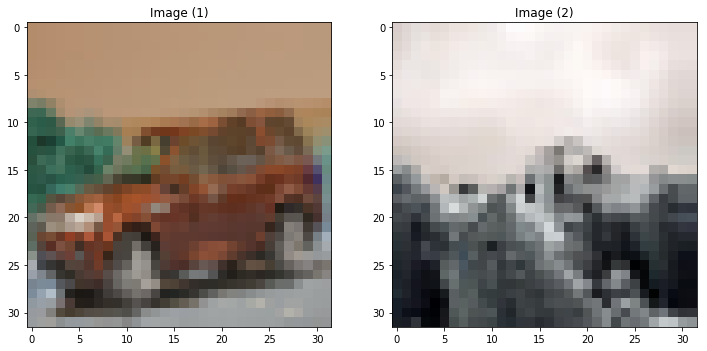



====================Prices==========================
[[926553]
 [   980]]


====================Labels==========================
[1 0]




====================Images==========================
54/85 [==================>...........] - ETA: 16s - loss: 8.7939 - acc: 0.4444

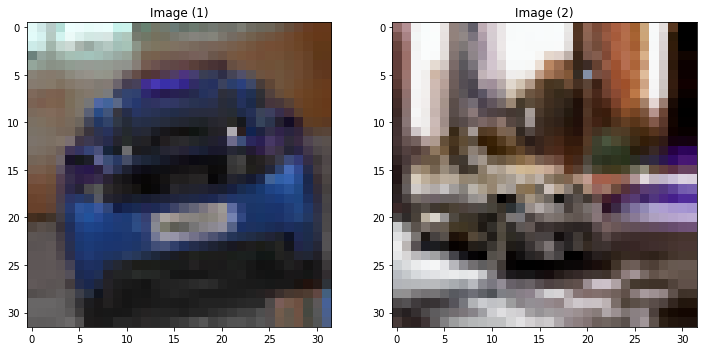



====================Prices==========================
[[702558]
 [594042]]


====================Labels==========================
[1 1]




====================Images==========================
55/85 [==================>...........] - ETA: 15s - loss: 8.6340 - acc: 0.4545

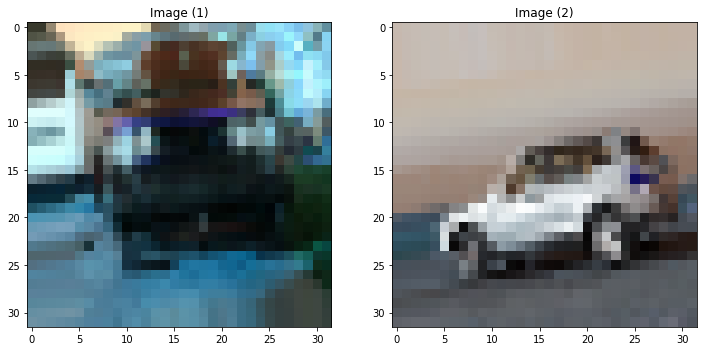



====================Prices==========================
[[2537]
 [5587]]


====================Labels==========================
[0 0]




====================Images==========================
56/85 [==================>...........] - ETA: 15s - loss: 8.7645 - acc: 0.4464

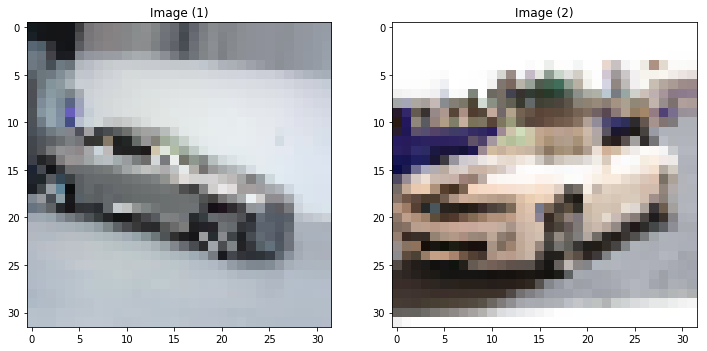



====================Prices==========================
[[ 26534]
 [478907]]


====================Labels==========================
[1 1]




====================Images==========================
57/85 [===================>..........] - ETA: 14s - loss: 8.6107 - acc: 0.4561

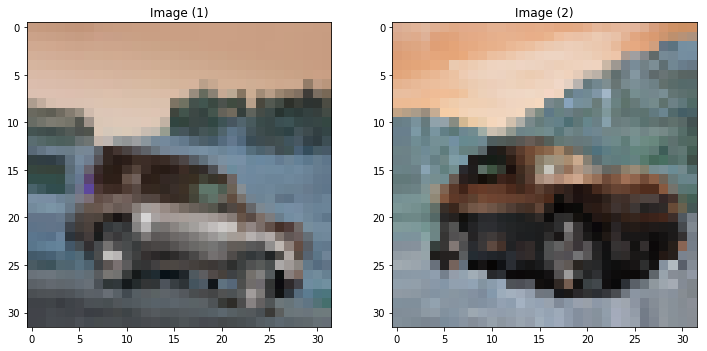



====================Prices==========================
[[  2409]
 [256523]]


====================Labels==========================
[0 1]




====================Images==========================
58/85 [===================>..........] - ETA: 14s - loss: 8.5997 - acc: 0.4569

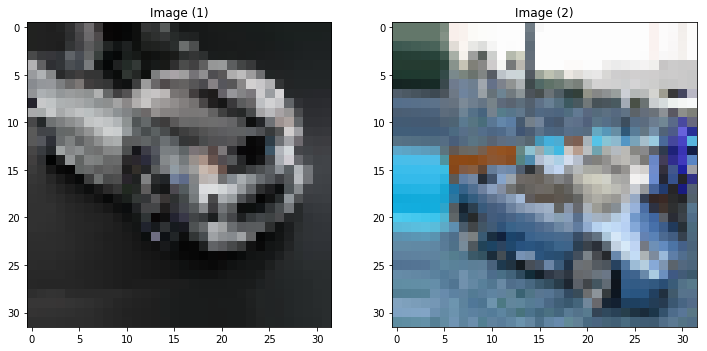



====================Prices==========================
[[507711]
 [898129]]


====================Labels==========================
[1 1]




====================Images==========================
59/85 [===================>..........] - ETA: 13s - loss: 8.4539 - acc: 0.4661

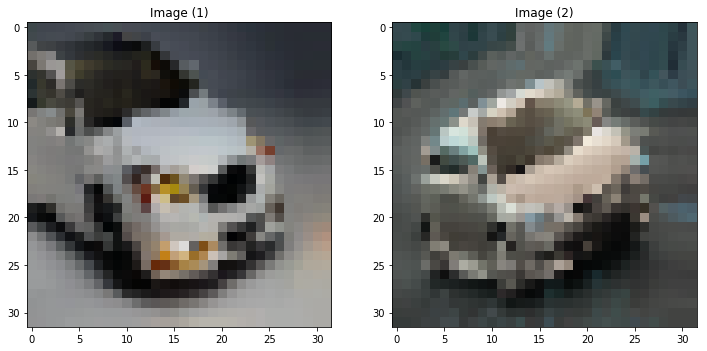



====================Prices==========================
[[1429]
 [ 160]]


====================Labels==========================
[0 0]




====================Images==========================
60/85 [====================>.........] - ETA: 13s - loss: 8.4515 - acc: 0.4667

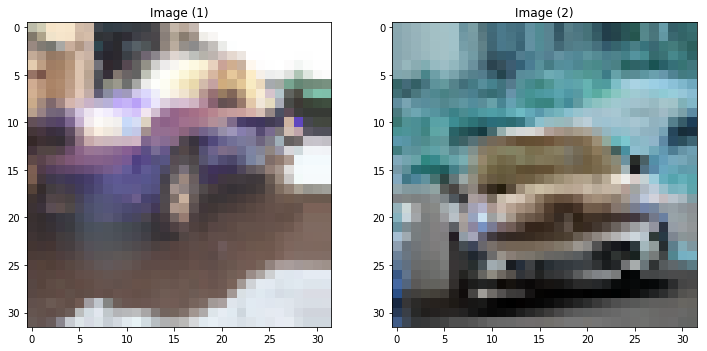



====================Prices==========================
[[   597]
 [823246]]


====================Labels==========================
[0 1]




====================Images==========================
61/85 [====================>.........] - ETA: 12s - loss: 8.3426 - acc: 0.4672

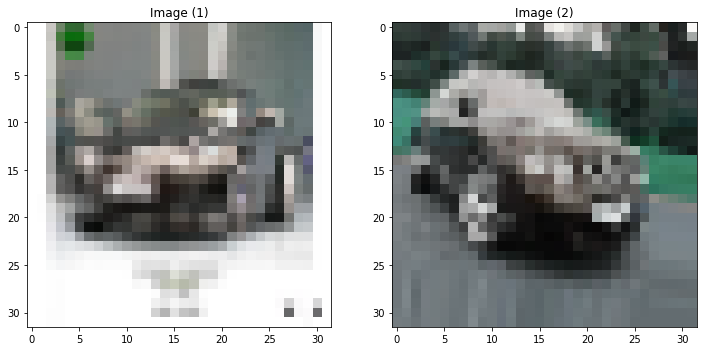



====================Prices==========================
[[874565]
 [797401]]


====================Labels==========================
[1 1]




====================Images==========================
62/85 [====================>.........] - ETA: 12s - loss: 8.2081 - acc: 0.4758

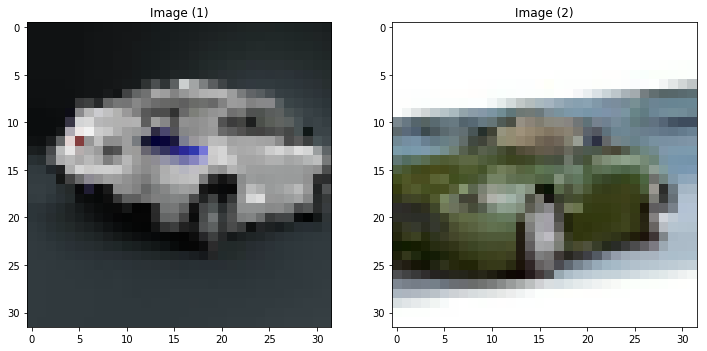



====================Prices==========================
[[960027]
 [674061]]


====================Labels==========================
[1 1]




====================Images==========================
63/85 [=====================>........] - ETA: 11s - loss: 8.0778 - acc: 0.4841

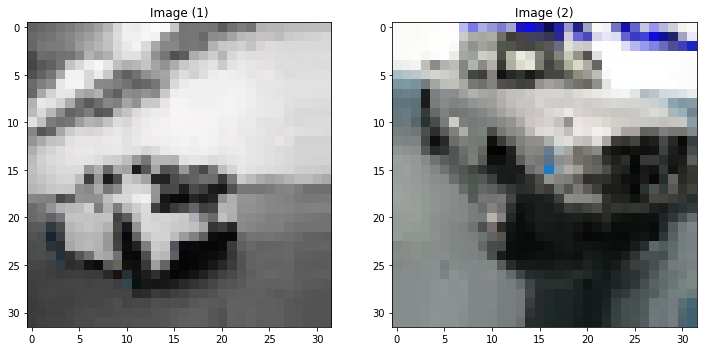



====================Prices==========================
[[676540]
 [  9114]]


====================Labels==========================
[1 0]




====================Images==========================
64/85 [=====================>........] - ETA: 11s - loss: 8.0761 - acc: 0.4844

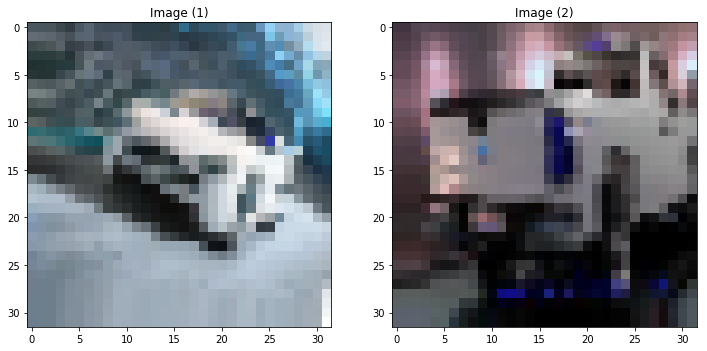



====================Prices==========================
[[147980]
 [   704]]


====================Labels==========================
[1 0]




====================Images==========================
65/85 [=====================>........] - ETA: 10s - loss: 7.9860 - acc: 0.4846

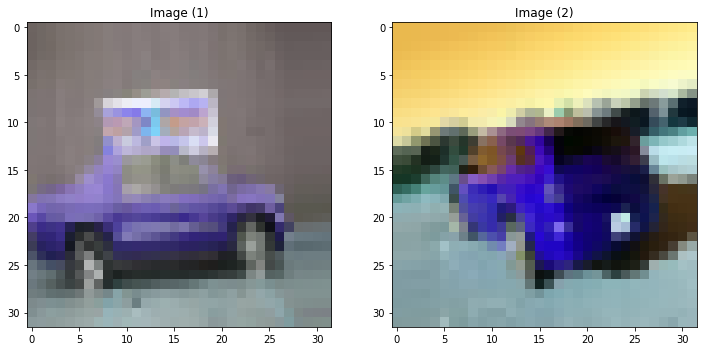



====================Prices==========================
[[  5383]
 [872910]]


====================Labels==========================
[0 1]




====================Images==========================
66/85 [======================>.......] - ETA: 9s - loss: 7.9858 - acc: 0.4848 

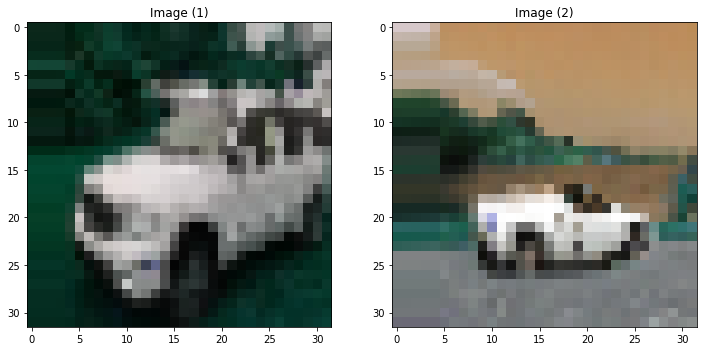



====================Prices==========================
[[  2577]
 [872116]]


====================Labels==========================
[0 1]




====================Images==========================
67/85 [======================>.......] - ETA: 9s - loss: 7.9856 - acc: 0.4851

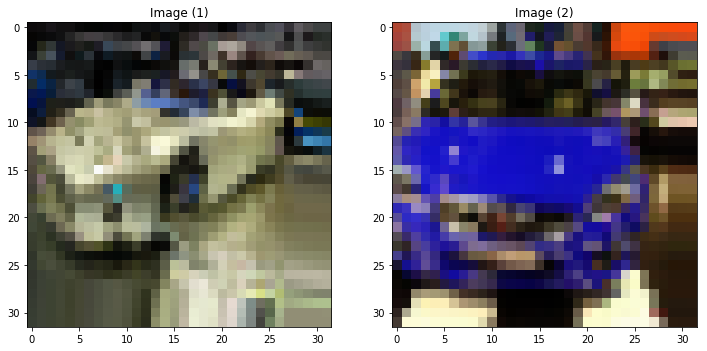



====================Prices==========================
[[204287]
 [747555]]


====================Labels==========================
[1 1]




====================Images==========================
68/85 [=======================>......] - ETA: 8s - loss: 7.8682 - acc: 0.4926

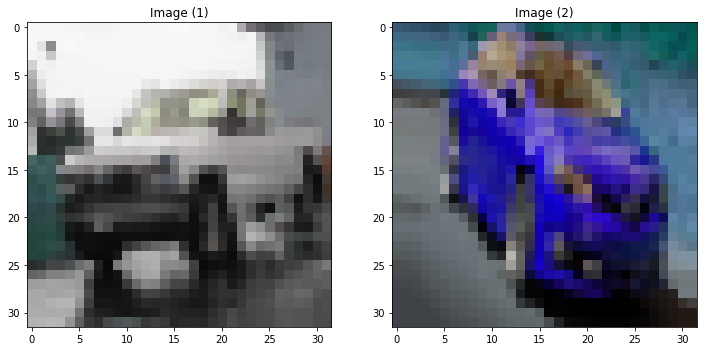



====================Prices==========================
[[2355]
 [5782]]


====================Labels==========================
[0 0]




====================Images==========================
69/85 [=======================>......] - ETA: 8s - loss: 7.9852 - acc: 0.4855

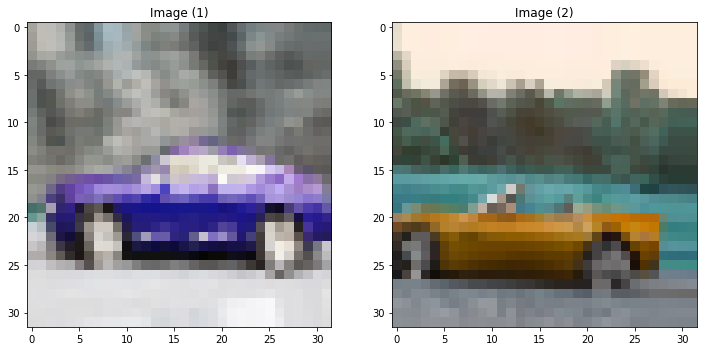



====================Prices==========================
[[974187]
 [431075]]


====================Labels==========================
[1 1]




====================Images==========================
70/85 [=======================>......] - ETA: 7s - loss: 7.8711 - acc: 0.4929

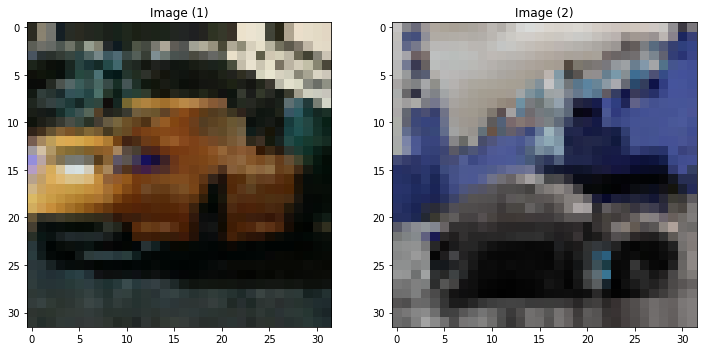



====================Prices==========================
[[ 51505]
 [978085]]


====================Labels==========================
[1 1]




====================Images==========================
71/85 [========================>.....] - ETA: 7s - loss: 7.7602 - acc: 0.5000

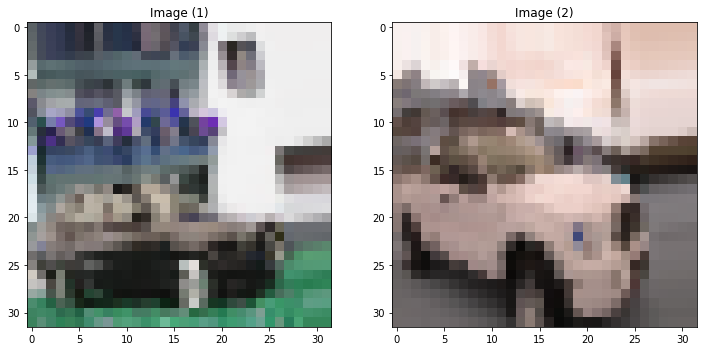



====================Prices==========================
[[1908]
 [9250]]


====================Labels==========================
[0 0]




====================Images==========================
72/85 [========================>.....] - ETA: 6s - loss: 7.8363 - acc: 0.4931

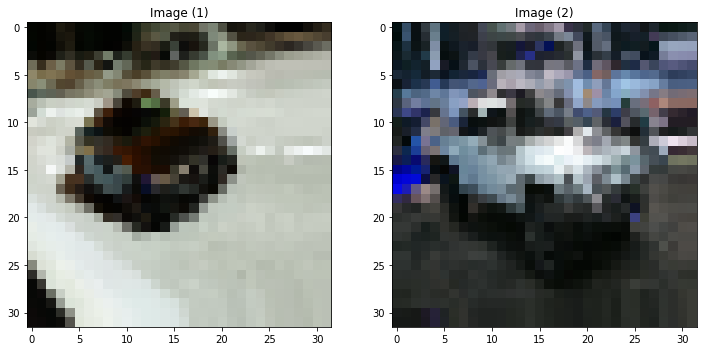



====================Prices==========================
[[434346]
 [  9514]]


====================Labels==========================
[1 0]




====================Images==========================
73/85 [========================>.....] - ETA: 6s - loss: 7.8382 - acc: 0.4932

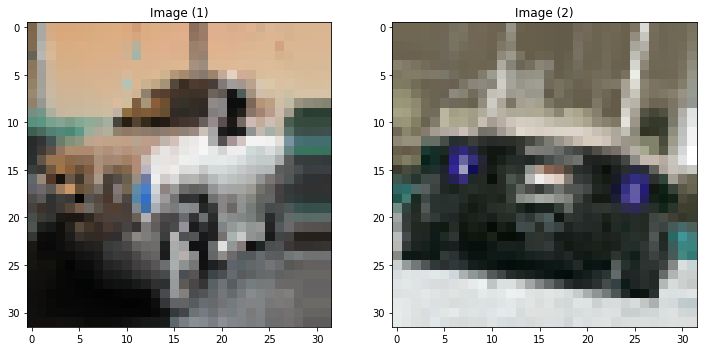



====================Prices==========================
[[  9729]
 [515664]]


====================Labels==========================
[0 1]




====================Images==========================
74/85 [=========================>....] - ETA: 5s - loss: 7.8400 - acc: 0.4932

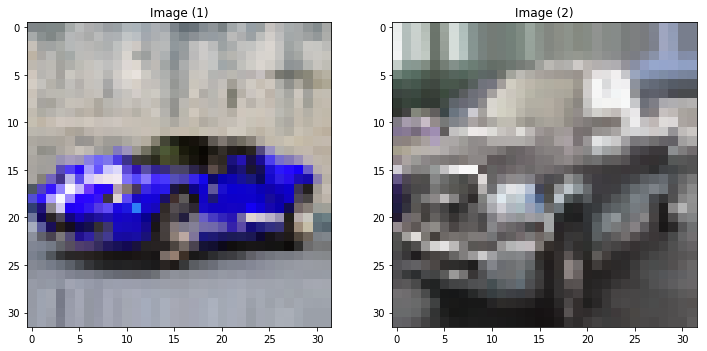



====================Prices==========================
[[131838]
 [  2378]]


====================Labels==========================
[1 0]




====================Images==========================
75/85 [=========================>....] - ETA: 5s - loss: 7.7893 - acc: 0.4933

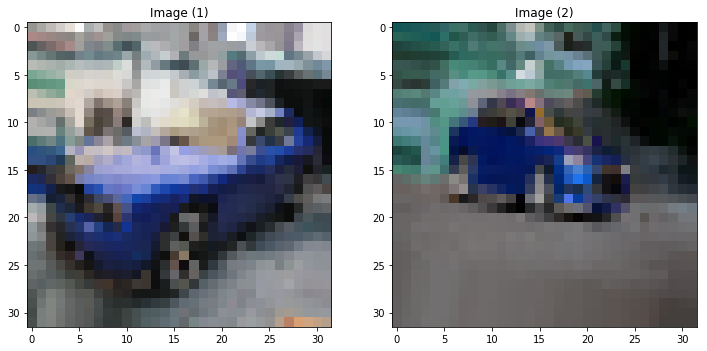



====================Prices==========================
[[173013]
 [  5802]]


====================Labels==========================
[1 0]




====================Images==========================
76/85 [=========================>....] - ETA: 4s - loss: 7.7917 - acc: 0.4934

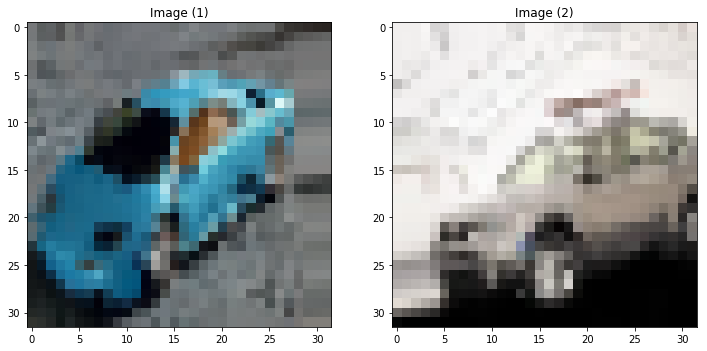



====================Prices==========================
[[866495]
 [  1239]]


====================Labels==========================
[1 0]




====================Images==========================
77/85 [==========================>...] - ETA: 4s - loss: 7.6948 - acc: 0.5000

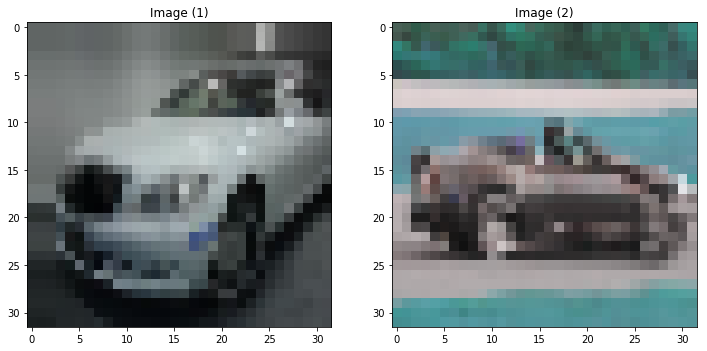



====================Prices==========================
[[ 67472]
 [195764]]


====================Labels==========================
[1 1]




====================Images==========================
78/85 [==========================>...] - ETA: 3s - loss: 7.5962 - acc: 0.5064

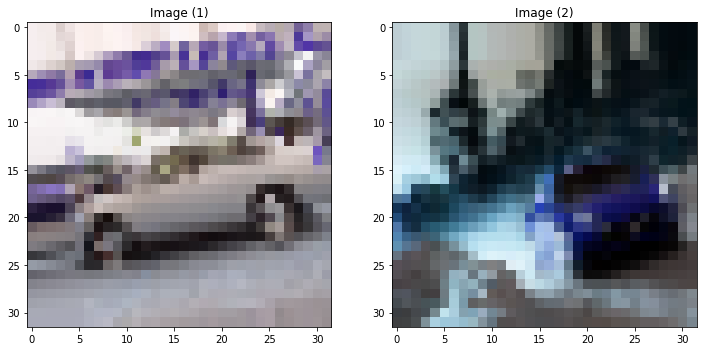



====================Prices==========================
[[   196]
 [674012]]


====================Labels==========================
[0 1]




====================Images==========================
79/85 [==========================>...] - ETA: 3s - loss: 7.5042 - acc: 0.5127

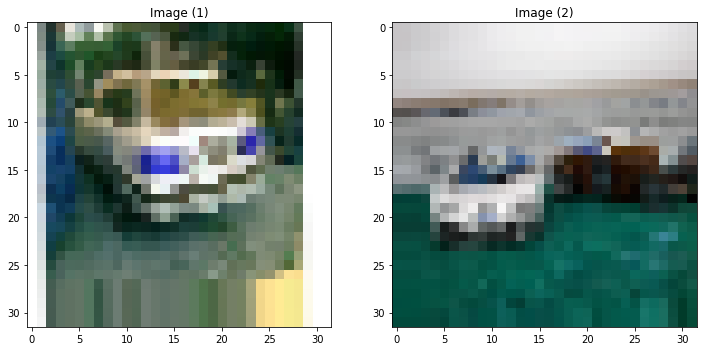



====================Prices==========================
[[  9027]
 [120610]]


====================Labels==========================
[0 1]




====================Images==========================
80/85 [===========================>..] - ETA: 2s - loss: 7.5101 - acc: 0.5125

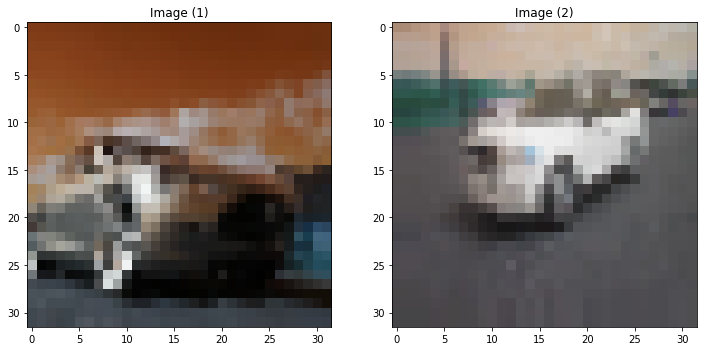



====================Prices==========================
[[524288]
 [   237]]


====================Labels==========================
[1 0]




====================Images==========================
81/85 [===========================>..] - ETA: 2s - loss: 7.4215 - acc: 0.5185

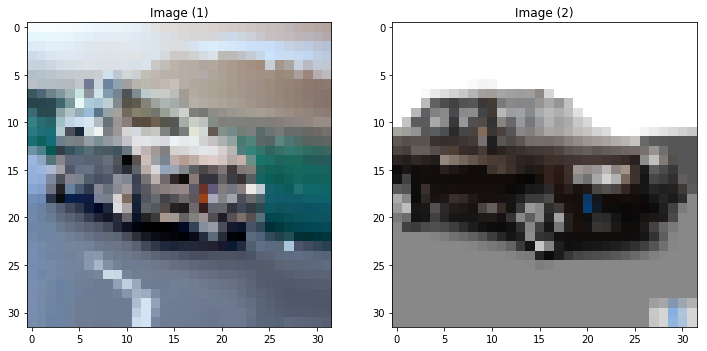



====================Prices==========================
[[376502]
 [436384]]


====================Labels==========================
[1 1]




====================Images==========================
82/85 [===========================>..] - ETA: 1s - loss: 7.3310 - acc: 0.5244

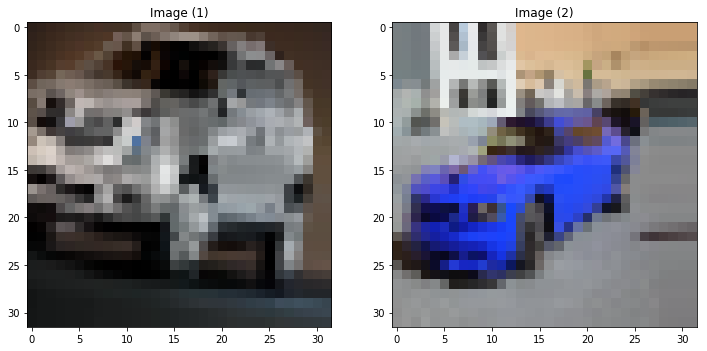



====================Prices==========================
[[273151]
 [201615]]


====================Labels==========================
[1 1]




====================Images==========================
83/85 [============================>.] - ETA: 1s - loss: 7.2426 - acc: 0.5301

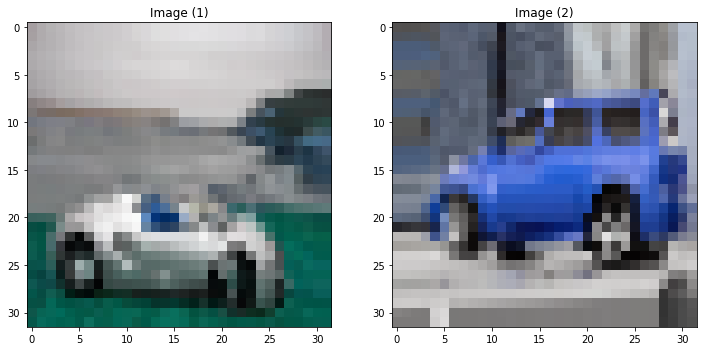



====================Prices==========================
[[588583]
 [  5250]]


====================Labels==========================
[1 0]




====================Images==========================
84/85 [============================>.] - ETA: 0s - loss: 7.1647 - acc: 0.5298

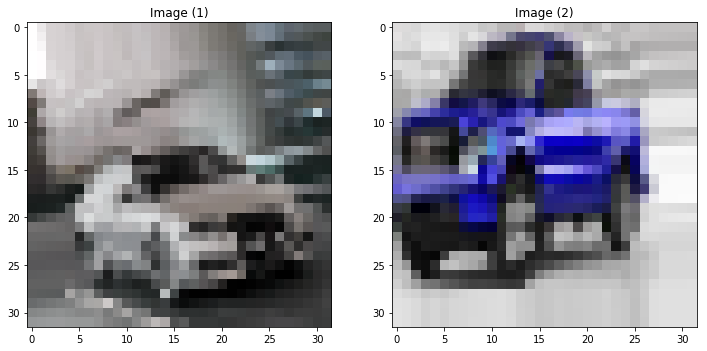



====================Prices==========================
[[822779]
 [  1723]]


====================Labels==========================
[1 0]




====================Images==========================


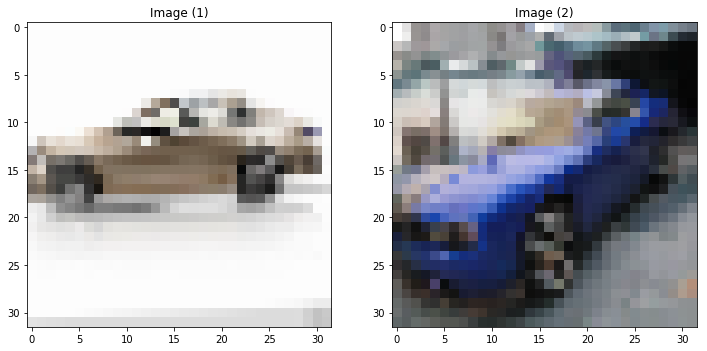



====================Prices==========================
[[  3365]
 [173013]]


====================Labels==========================
[0 1]




====================Images==========================
85/85 [==============================] - 45s 534ms/step - loss: 7.0885 - acc: 0.5294 - val_loss: 0.6928 - val_acc: 0.5128


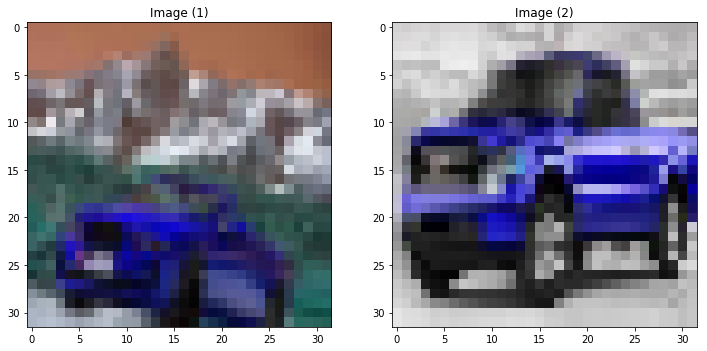



====================Prices==========================
[[62004]
 [ 1723]]


====================Labels==========================
[1 0]


In [15]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['accuracy'])

# train the model
print("[INFO] training model...")
model.fit_generator(
       gen_flow,
       validation_data=([images_valid, prices_valid], labels_valid),
       steps_per_epoch=len(images_train) / attr.batch_size, epochs=2)






====================Images==========================


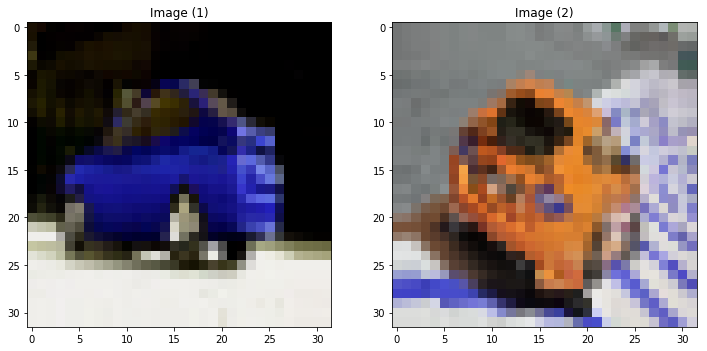



====================Prices==========================
[[  6663]
 [501141]]


====================Labels==========================
[0 1]




====================Images==========================
 1/30 [>.............................] - ETA: 17s

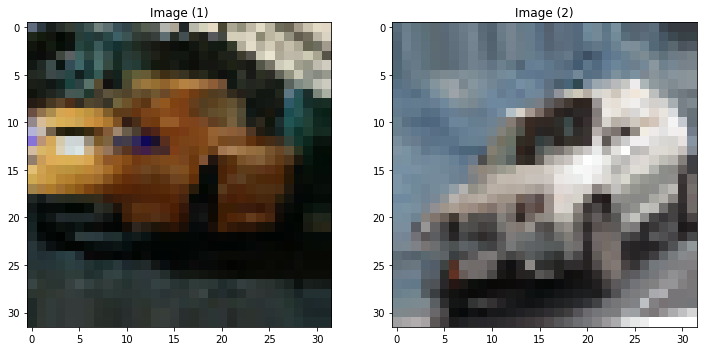



====================Prices==========================
[[51505]
 [ 3126]]


====================Labels==========================
[1 0]




====================Images==========================
 2/30 [=>............................] - ETA: 16s

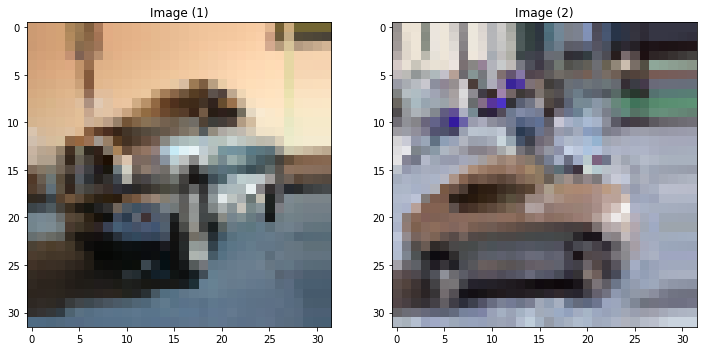



====================Prices==========================
[[  5371]
 [943813]]


====================Labels==========================
[0 1]




====================Images==========================
 3/30 [==>...........................] - ETA: 15s

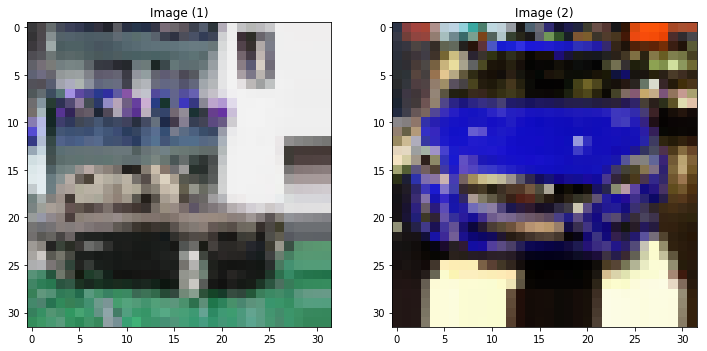



====================Prices==========================
[[  1908]
 [747555]]


====================Labels==========================
[0 1]




====================Images==========================
 4/30 [===>..........................] - ETA: 15s

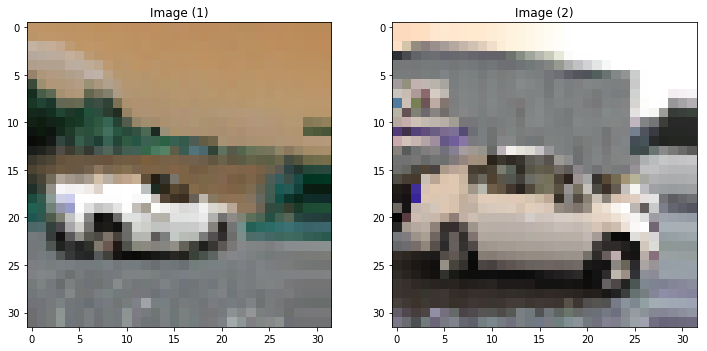



====================Prices==========================
[[872116]
 [  8486]]


====================Labels==========================
[1 0]




====================Images==========================
 5/30 [====>.........................] - ETA: 14s

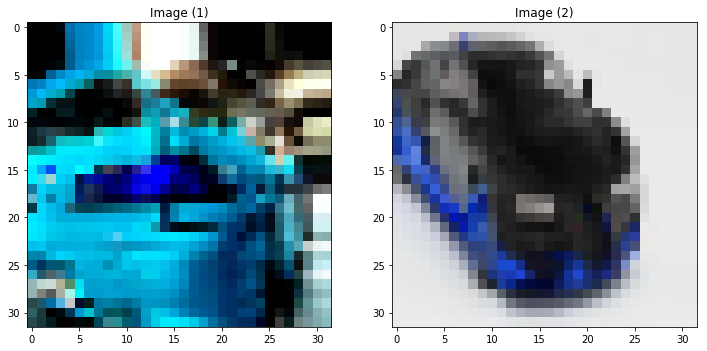



====================Prices==========================
[[  7285]
 [412084]]


====================Labels==========================
[0 1]




====================Images==========================
 6/30 [=====>........................] - ETA: 14s

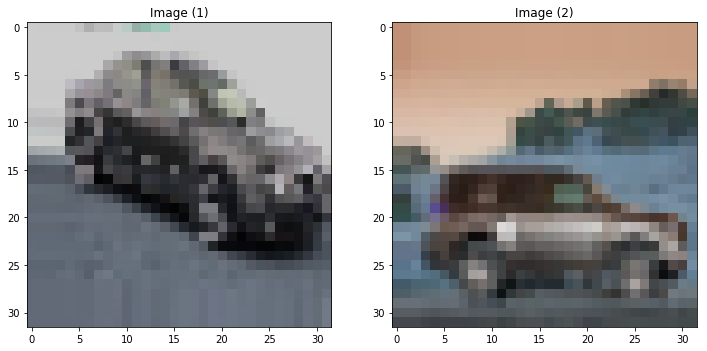



====================Prices==========================
[[8831]
 [2409]]


====================Labels==========================
[0 0]




====================Images==========================
 7/30 [======>.......................] - ETA: 14s

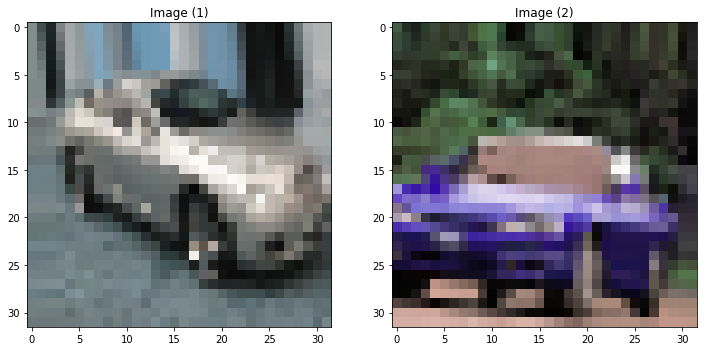



====================Prices==========================
[[687336]
 [  6525]]


====================Labels==========================
[1 0]




====================Images==========================
 8/30 [=======>......................] - ETA: 13s

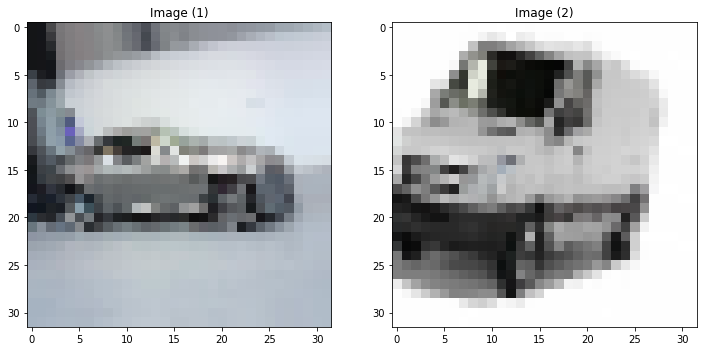



====================Prices==========================
[[26534]
 [ 2620]]


====================Labels==========================
[1 0]




====================Images==========================
 9/30 [========>.....................] - ETA: 12s

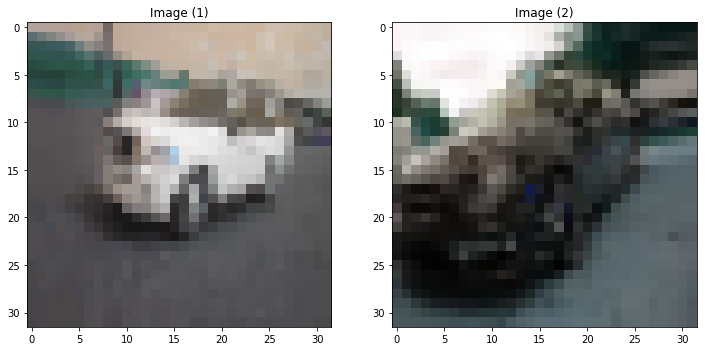



====================Prices==========================
[[   237]
 [730904]]


====================Labels==========================
[0 1]




====================Images==========================
10/30 [=========>....................] - ETA: 11s

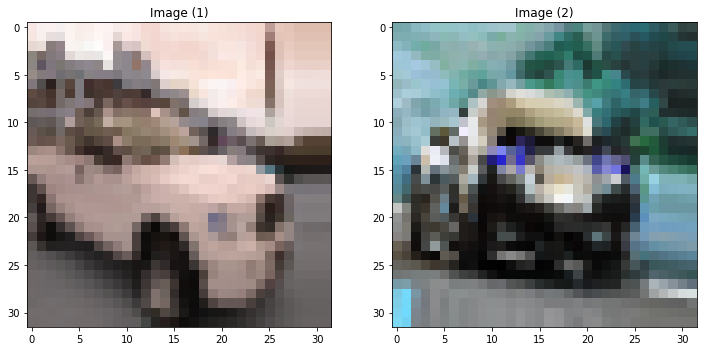



====================Prices==========================
[[  9250]
 [808864]]


====================Labels==========================
[0 1]




====================Images==========================
11/30 [==========>...................] - ETA: 11s

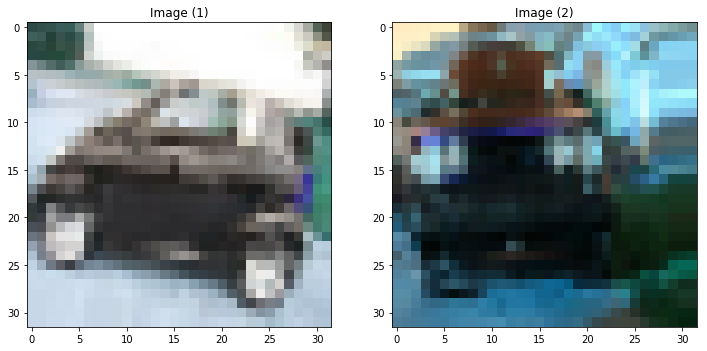



====================Prices==========================
[[3800]
 [2537]]


====================Labels==========================
[0 0]




====================Images==========================
12/30 [===========>..................] - ETA: 10s

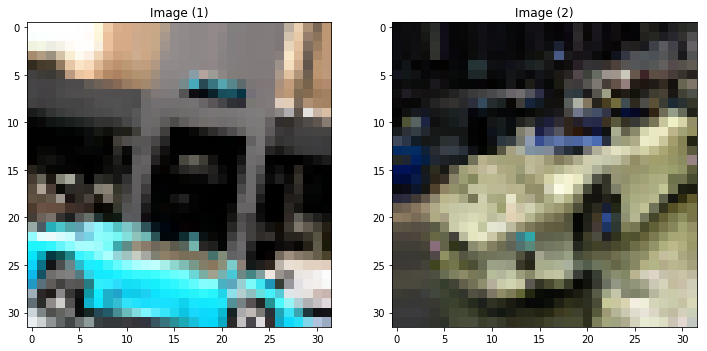



====================Prices==========================
[[943462]
 [204287]]


====================Labels==========================
[1 1]




====================Images==========================
13/30 [============>.................] - ETA: 9s 

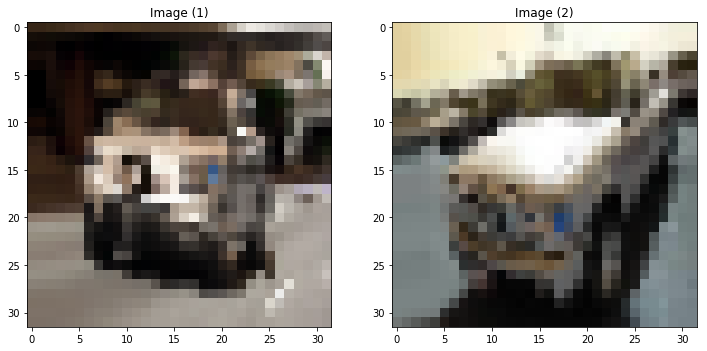



====================Prices==========================
[[7293]
 [ 703]]


====================Labels==========================
[0 0]




====================Images==========================
14/30 [=============>................] - ETA: 9s

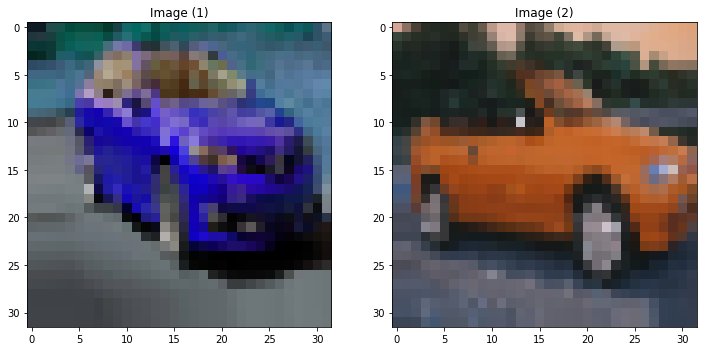



====================Prices==========================
[[5782]
 [4347]]


====================Labels==========================
[0 0]




====================Images==========================
15/30 [==============>...............] - ETA: 8s

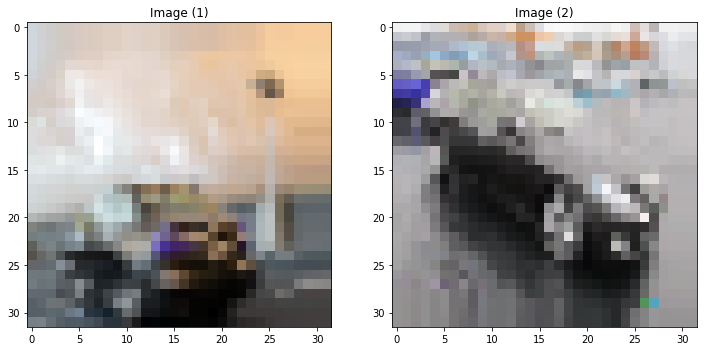



====================Prices==========================
[[488051]
 [  6798]]


====================Labels==========================
[1 0]




====================Images==========================
16/30 [===============>..............] - ETA: 8s

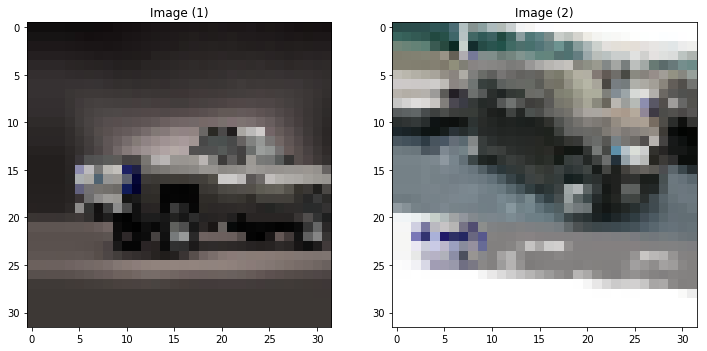



====================Prices==========================
[[1596]
 [1077]]


====================Labels==========================
[0 0]




====================Images==========================
17/30 [================>.............] - ETA: 7s

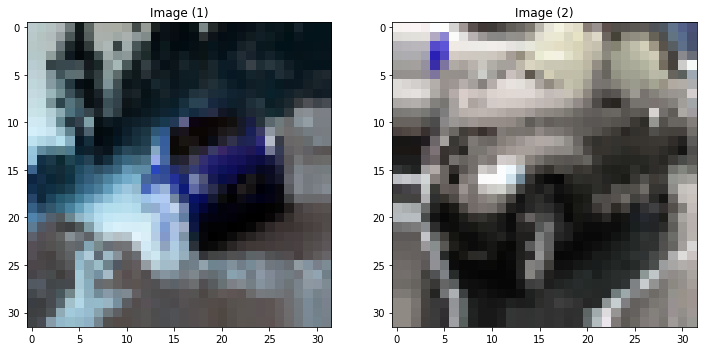



====================Prices==========================
[[674012]
 [  2987]]


====================Labels==========================
[1 0]




====================Images==========================
18/30 [=================>............] - ETA: 7s

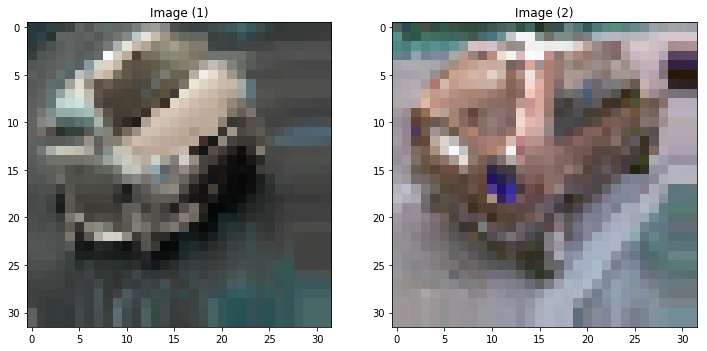



====================Prices==========================
[[ 160]
 [9398]]


====================Labels==========================
[0 0]




====================Images==========================
19/30 [==================>...........] - ETA: 6s

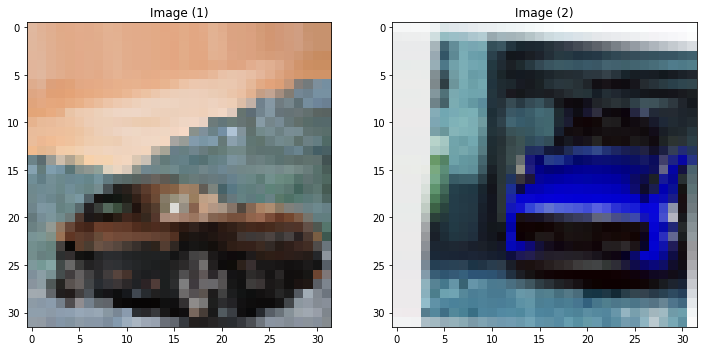



====================Prices==========================
[[256523]
 [242291]]


====================Labels==========================
[1 1]




====================Images==========================
20/30 [===================>..........] - ETA: 5s

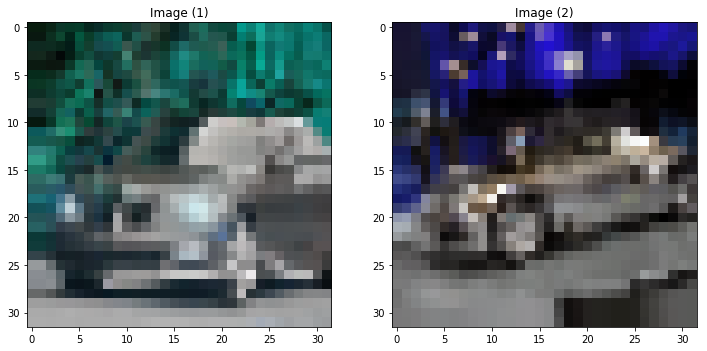



====================Prices==========================
[[924721]
 [982190]]


====================Labels==========================
[1 1]




====================Images==========================
21/30 [====================>.........] - ETA: 5s

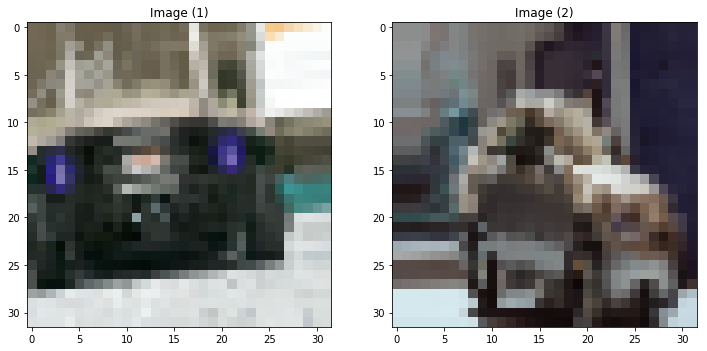



====================Prices==========================
[[515664]
 [  5591]]


====================Labels==========================
[1 0]




====================Images==========================
22/30 [=====================>........] - ETA: 4s

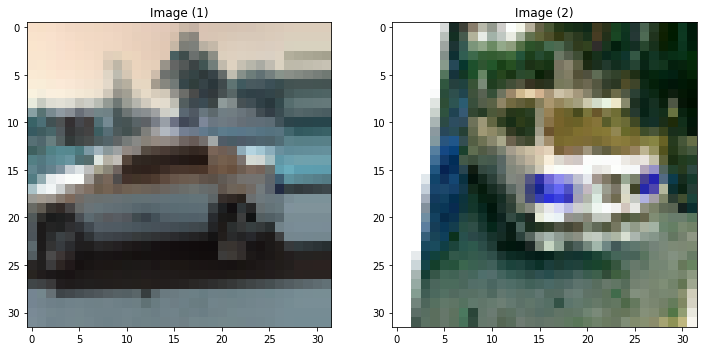



====================Prices==========================
[[1547]
 [9027]]


====================Labels==========================
[0 0]




====================Images==========================
23/30 [======================>.......] - ETA: 4s

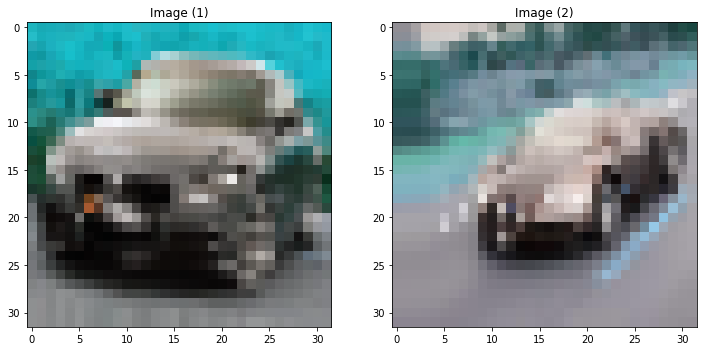



====================Prices==========================
[[754890]
 [940192]]


====================Labels==========================
[1 1]




====================Images==========================
24/30 [=======================>......] - ETA: 3s

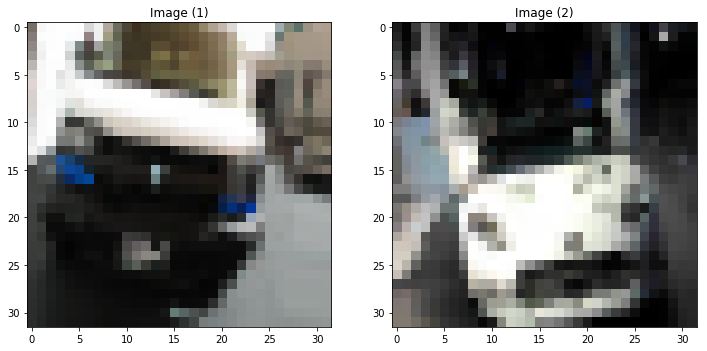



====================Prices==========================
[[  2234]
 [311904]]


====================Labels==========================
[0 1]




====================Images==========================
25/30 [========================>.....] - ETA: 2s

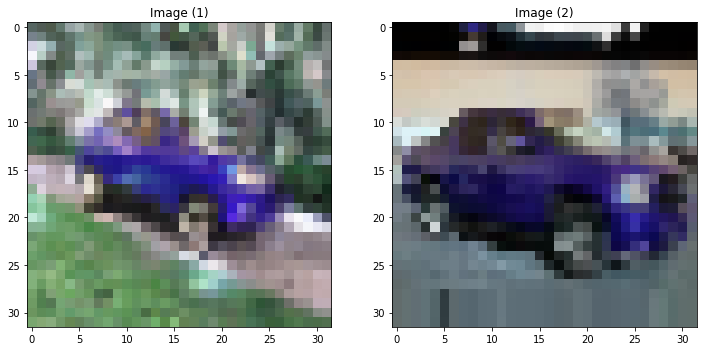



====================Prices==========================
[[3641]
 [5925]]


====================Labels==========================
[0 0]




====================Images==========================
26/30 [=========================>....] - ETA: 2s

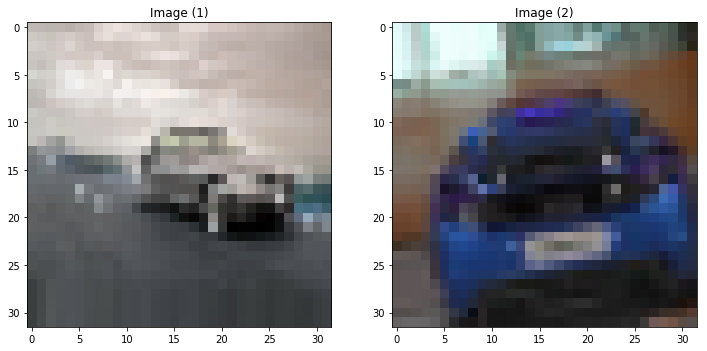



====================Prices==========================
[[752437]
 [702558]]


====================Labels==========================
[1 1]




====================Images==========================
27/30 [==========================>...] - ETA: 1s

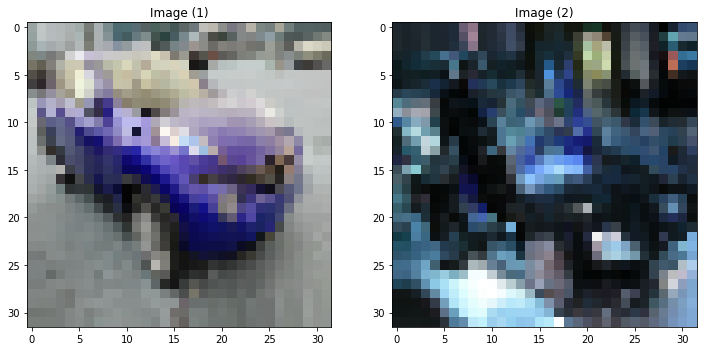



====================Prices==========================
[[  8186]
 [643521]]


====================Labels==========================
[0 1]




====================Images==========================
28/30 [===========================>..] - ETA: 1s

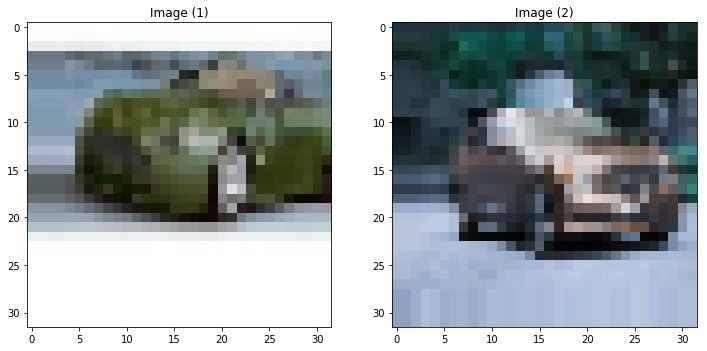



====================Prices==========================
[[674061]
 [  9192]]


====================Labels==========================
[1 0]




====================Images==========================
29/30 [============================>.] - ETA: 0s

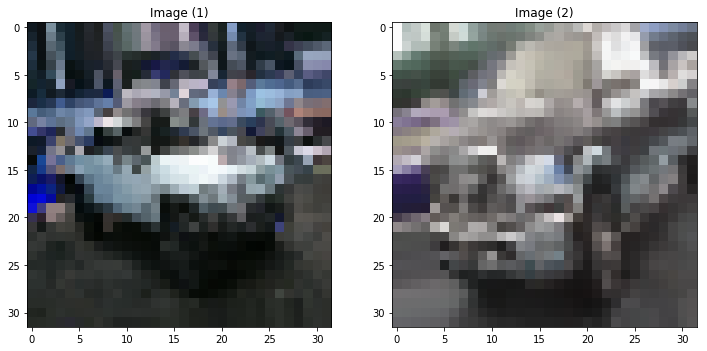



====================Prices==========================
[[9514]
 [2378]]


====================Labels==========================
[0 0]




====================Images==========================
30/30 [==============================] - 18s 590ms/step


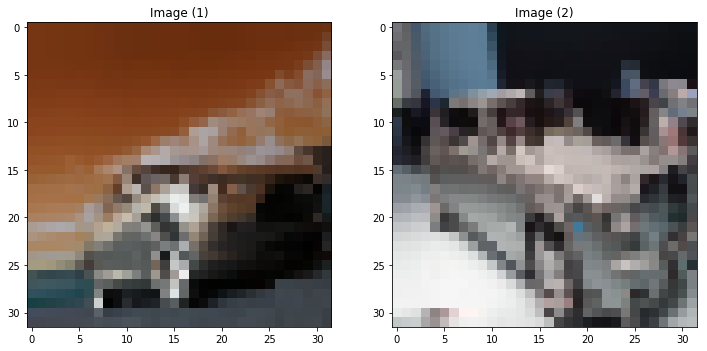



====================Prices==========================
[[524288]
 [515991]]


====================Labels==========================
[1 1]


In [16]:
score_gen = model.evaluate_generator(generator=gen_flow, steps=len(images_test),verbose=1)

In [17]:
print(score_gen)

[0.6897427439689636, 0.5666666666666667]


In [25]:
labels=[]
labels.append('bla')
labels.append('foo')
labels.append('bar')
numpy_labels = np.array(labels)

np.save('c:/temp/labels.npy', numpy_labels)

foo3 = np.load('c:/temp/labels.npy')

print(numpy_labels)
print(foo3)

['bla' 'foo' 'bar']
['bla' 'foo' 'bar']
